In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!pip install
import pandas as pd
import json
from bib.cleaning import *
from bib.plot import *
from bib.rede import *
import plotly.graph_objects as go
!pip freeze > requirements.txt

In [3]:
comes_f = pd.read_excel('./input/RawData_ComesF.xlsx',header =2)
comes_f = comes_f.loc[:, ~comes_f.columns.str.contains('lieux')]
comes_f.columns = [col.lower() for col in comes_f.columns]
comes_f = comes_f.loc[:, comes_f.columns.str.contains('age')]
comes_f = comes_f.loc[:, ~comes_f.columns.str.contains('personne')]
comes_f = comes_f.loc[:, ~comes_f.columns.str.contains('min')]
comes_f = comes_f.loc[:, ~comes_f.columns.str.contains('max')]
comes_f = comes_f.loc[:, ~comes_f.columns.str.contains("l'enfant")]

In [4]:
contatos = {}
idade = comes_f['age du sujet de l\'enquête'].values
for index, row in comes_f.iterrows():
    valores_ate_nan = row[:row.isna().idxmax()].tolist() 
    contatos[index] = np.array(valores_ate_nan)[:-1].tolist()

print(contatos)

{0: [38.0, 68.0, 55.0], 1: [0.0, 29.0, 33.0, 3.0, 41.0, 13.0, 18.0], 2: [18.0, 49.0, 48.0, 16.0, 57.0, 22.0, 47.0, 28.0, 29.0, 6.0, 32.0, 50.0], 3: [74.0, 81.0, 75.0, 69.0, 42.0, 74.0, 76.0], 4: [71.0, 73.0, 45.0, 55.0], 5: [67.0, 65.0, 12.0, 10.0, 8.0, 44.0, 42.0, 37.0], 6: [4.0, 76.0, 74.0, 48.0, 50.0, 36.0, 34.0, 10.0, 8.0, 1.0], 7: [18.0, 48.0, 16.0, 19.0, 18.0, 25.0, 18.0, 32.0, 21.0], 8: [9.0, 43.0, 15.0, 13.0, 64.0], 9: [78.0, 65.0, 67.0, 54.0, 41.0, 15.0, 11.0, 43.0], 10: [54.0, 35.0, 55.0, 62.0, 71.0, 40.0, 45.0, 52.0, 62.0, 62.0, 55.0, 53.0], 11: [55.0, 52.0], 12: [67.0, 32.0, 32.0, 73.0], 13: [77.0, 21.0, 30.0, 70.0, 60.0, 65.0, 19.0, 72.0, 58.0, 42.0, 27.0, 27.0, 32.0, 30.0, 52.0], 14: [24.0, 24.0, 31.0], 15: [69.0, 50.0, 55.0, 47.0, 47.0, 67.0, 62.0, 72.0, 64.0, 69.0, 80.0, 38.0], 16: [64.0, 68.0, 41.0, 27.0], 17: [52.0, 66.0, 59.0], 18: [2.0, 31.0, 34.0, 48.0, 5.0, 4.0, 17.0, 14.0, 80.0, 68.0, 46.0, 27.0, 20.0, 25.0, 40.0, 33.0, 27.0, 47.0], 19: [12.0, 13.0, 16.0, 40.0, 4

In [30]:

def get_faixa(idade):
    faixas = np.array([ 20,30,50,70,1e8])
    indices = np.searchsorted(faixas,idade,side='right')
    indices= np.where(indices < len(faixas),indices,None)
    return indices

In [33]:
idade = get_faixa(idade)

In [43]:
Contatos = np.zeros((len(contatos),5))
for i in contatos:
    valores = get_faixa(np.array(contatos[i]))
    for j in valores:
        Contatos[i][j] += 1

In [44]:
Contatos

array([[0., 0., 1., 2., 0.],
       [4., 1., 2., 0., 0.],
       [3., 3., 4., 2., 0.],
       ...,
       [4., 2., 4., 0., 0.],
       [3., 0., 5., 1., 0.],
       [3., 0., 8., 3., 1.]])

In [13]:
data,contatos,contatos02 = generate_df()

/home/miguel/Downloads/Code/Github/pesquisa_mestrado/bib/cleaning.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, 'id', list(contatos.index))
/home/miguel/Downloads/Code/Github/pesquisa_mestrado/bib/cleaning.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(0, 'id', list(contatos.index))
/home/miguel/Downloads/Code/Github/pesquisa_mestrado/bib/cleaning.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [8]:
def proportion(x):
    y = np.unique(x,return_counts=True)
    plt.bar(y[0]+1,y[1]/np.sum(y[1]))
    plt.grid()
    plt.title("Proporção entre Faixas Etárias")
    plt.savefig("./img/proportion.png")
    plt.show()
    

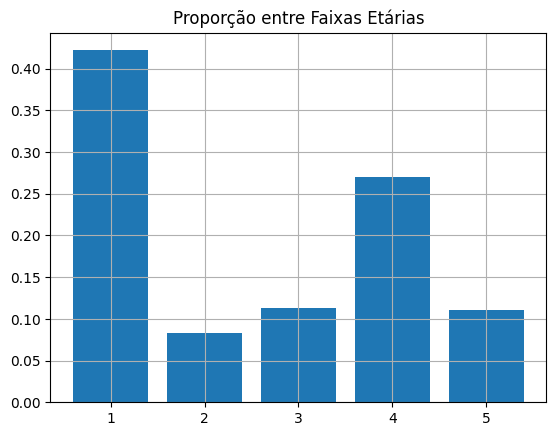

In [9]:
proportion(data['Faixas'].values)

In [22]:
faixas = contatos['faixas'].values.tolist() + data['Faixas'].values.tolist() + contatos02['faixas'].values.tolist()

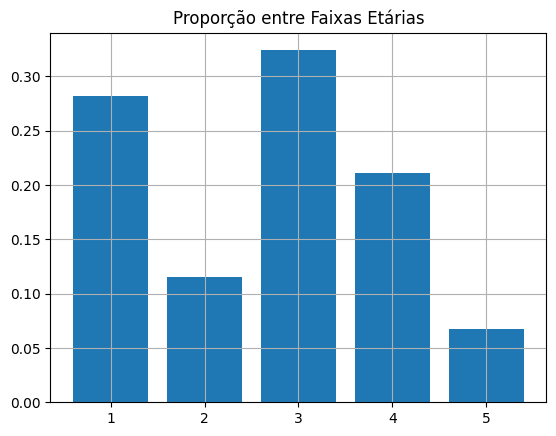

In [23]:
proportion(faixas)

In [9]:
data

,Idade,Sexo,#Familiares,Profissão,Setor,id,#Contatos01,#Contatos02,Dia01,Dia02,Faixas
0,38,2,2,9.0,NaN,0,2,1,105.0,205.0,2
1,0,2,4,5.0,10.0,1,6,4,2004.0,2104.0,0
2,18,2,4,7.0,NaN,2,11,10,205.0,305.0,0
3,74,1,2,8.0,NaN,3,6,1,2904.0,3004.0,4
4,71,1,1,8.0,NaN,4,3,2,2004.0,2104.0,4
...,...,...,...,...,...,...,...,...,...,...,...
2028,12,2,4,7.0,NaN,2028,10,9,2404.0,2504.0,0
2029,2,1,4,10.0,NaN,2029,10,15,2204.0,2304.0,0
2030,22,1,5,5.0,9.0,2030,9,10,1704.0,1804.0,1
2031,0,1,5,NaN,NaN,2031,8,9,2404.0,2504.0,0


In [4]:
contagem = pd.crosstab(contatos['id'], contatos['faixas']).values.tolist()
contagem02 = pd.crosstab(contatos02['id'], contatos02['faixas']).values.tolist()

In [5]:
graus = contagem+contagem02

In [6]:
faixas = data[data['id'].isin(contatos['id'].unique())]['Faixas'].values.tolist() +data[data['id'].isin(contatos02['id'].unique())]['Faixas'].values.tolist() 

In [9]:
def grau_distribution(data,contatos,contatos02):
    contagem = pd.crosstab(contatos['id'], contatos['faixas'])
    ids = contagem.index
    contagem = contagem.values
    contagem = {i:j for i,j in zip(ids,contagem)}

    contagem02 = pd.crosstab(contatos02['id'], contatos02['faixas'])
    ids = contagem02.index
    contagem02 = contagem02.values
    contagem02 = {i:j for i,j in zip(ids,contagem02)}

    graus = np.zeros((2033,5))

    for i in contagem:
        graus[i] += np.array(contagem[i])

    for i in contagem02:
        graus[i] = np.array(contagem02[i]) if(np.array_equal(graus[i], [0,0,0,0,0]))  else (graus[i] +  np.array(contagem02[i]))/2

    graus = np.ceil(graus)
    soma = np.sum(graus,axis = 1)
    graus = graus[np.argsort(soma)[::-1]]
    faixas = data["Faixas"].values
    faixas = faixas[np.argsort(soma)[::-1]]
    graus = graus[:-8]
    faixas = faixas[:-8]
    return graus,faixas

In [8]:
graus,faixas = grau_distribution(data,contatos,contatos02)

In [10]:
def probability_distribution(graus,faixas):
    N = np.unique(faixas,return_counts=True)[1]
    for i in range(5):
        f = graus[faixas == i,:].T
        mascara = np.arange(graus.shape[1]) != i
        f[i] = f[i]/N[i]
        f[mascara,:] = 2*f[mascara,:]/N[mascara][:, np.newaxis]
        for j in range(5):
            y,x = np.histogram(f[j])
            x = x[1:]
            x = x[y > 1]
            y = y[y > 1]

            plt.scatter(x,np.log(y),label = f'Faixa {j+1}')
        plt.legend()
        plt.grid()
        plt.title(f"Faixa {i+1}")
        plt.show()

In [7]:
def LM(x,y,axs,color):
    X = x.reshape(-1,1)
    regressor = LinearRegression()
    regressor.fit(X, y)
    coeficientes = regressor.coef_[0]
    intercepto = regressor.intercept_

    # Calcular o coeficiente de determinação (R²)
    r2 = regressor.score(X, y)
    axs.plot(x,x*coeficientes + intercepto,c = color,label = 'R² :{:.3f}, {:.3f}x + {:.3f}'.format(r2,coeficientes,intercepto))
    return coeficientes,intercepto

In [23]:
def degree_distribution(graus,faixas,tipo = 0):
    c = ['red','blue','green','k','navy']
    M = np.zeros((5,5))
    A = np.zeros((5,5))
    for i in range(5):
        degree = graus[faixas == i,:].T
        rang = np.arange(41)
        fig, axs = plt.subplots(5,figsize=(8, 20))
        k = 0
        for deg,color in zip(degree,c):
            hist = np.zeros(len(rang))
            for j in deg:
                hist[int(j)] += 1
            hist = hist/np.sum(hist)

            x = rang[hist != 0 ]
            hist = hist[hist != 0 ]

            hist = np.log(hist)
            hist = hist[x <10]
            x = x[x<10]
            if(tipo == 1):
                hist = hist[x > 0]
                x = x[x > 0]
                x = np.log(x)
            
            axs[k].scatter(x,hist,c = color)
            M[i][k],A[i][k] = LM(x,hist,axs[k],color)
            axs[k].grid()
            k += 1
        fig.suptitle(f"Faixa {int(i)+1}")
        fig.legend()
        plt.show()
    return M,A

In [15]:
graus = np.array(graus)
faixas = np.array(faixas)

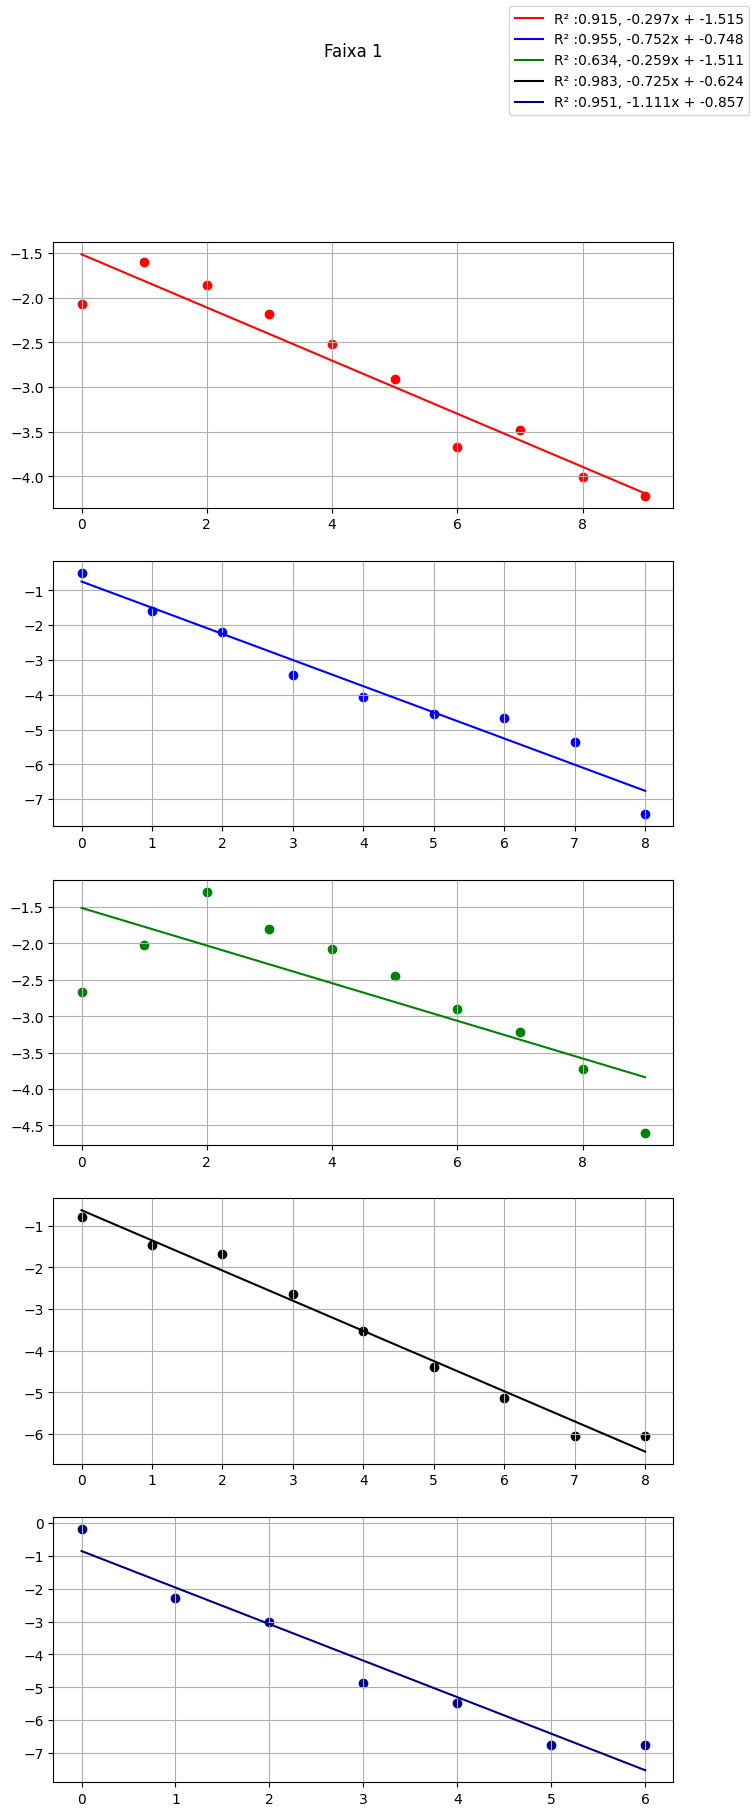

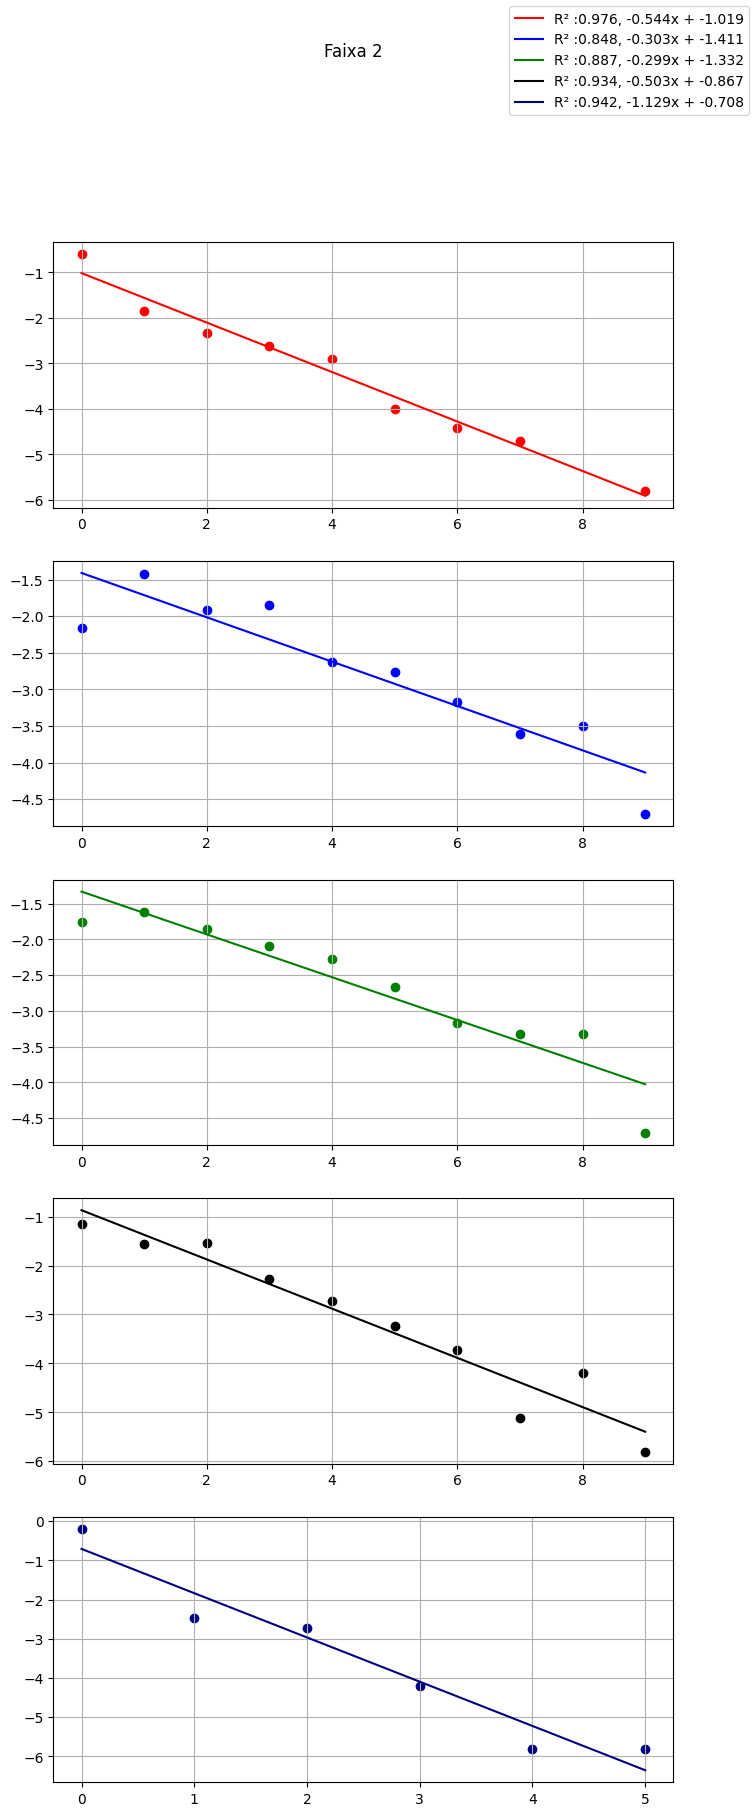

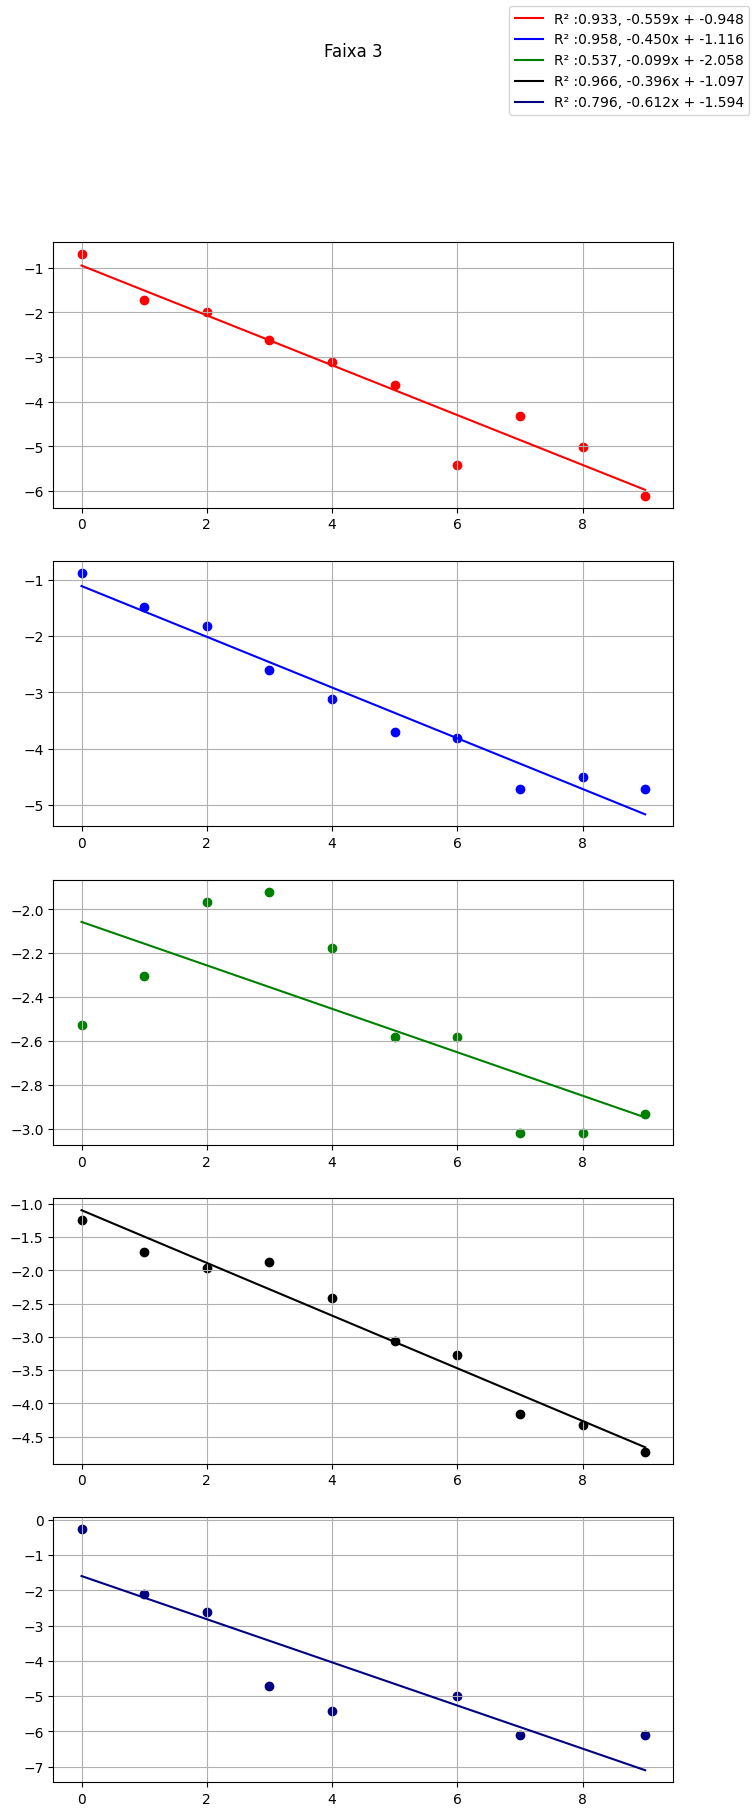

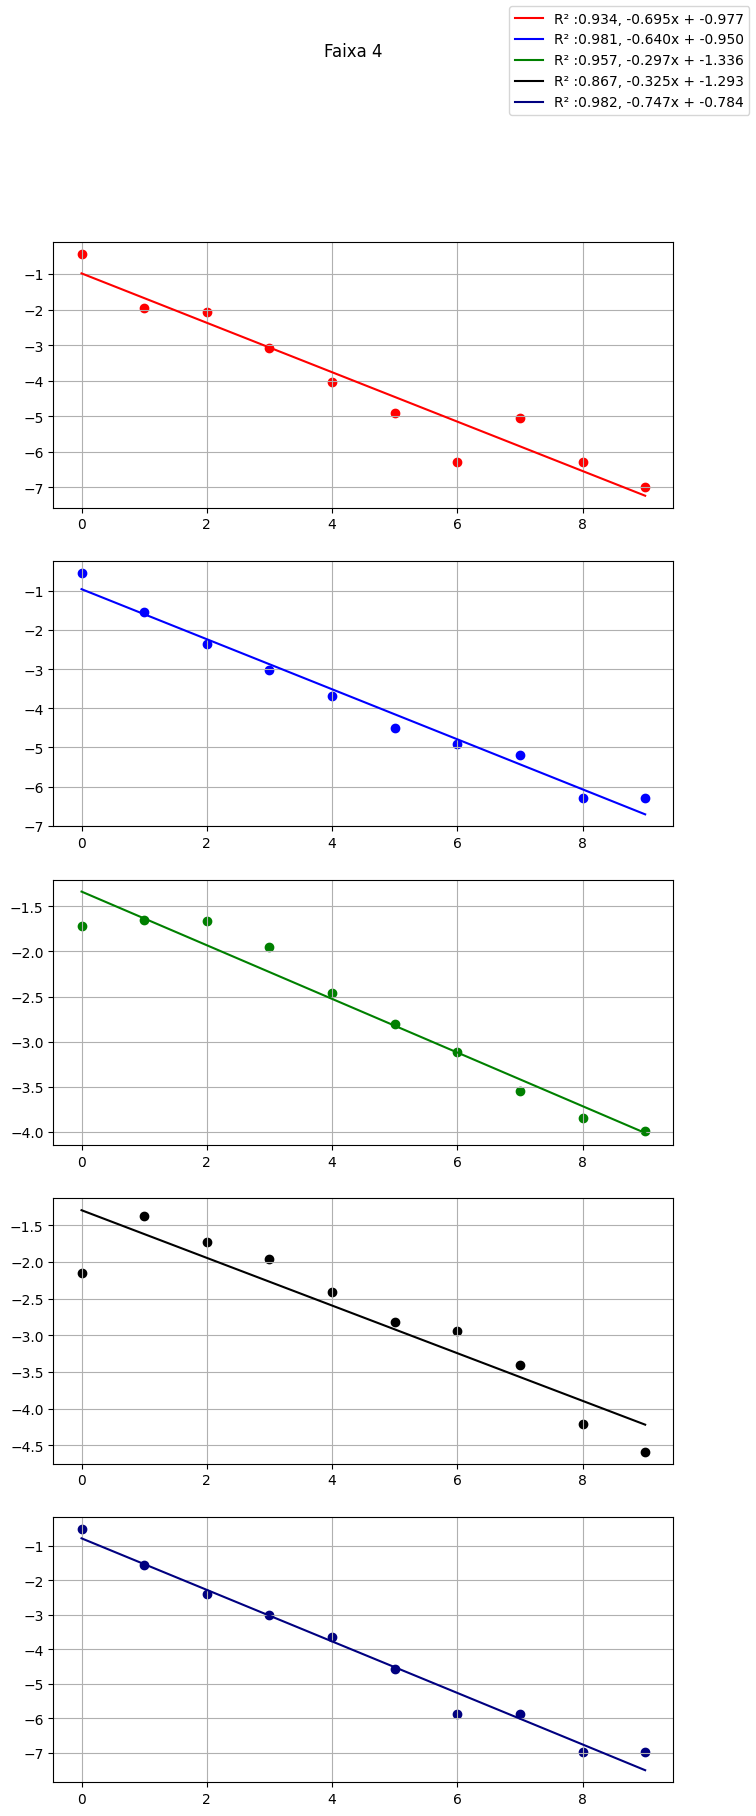

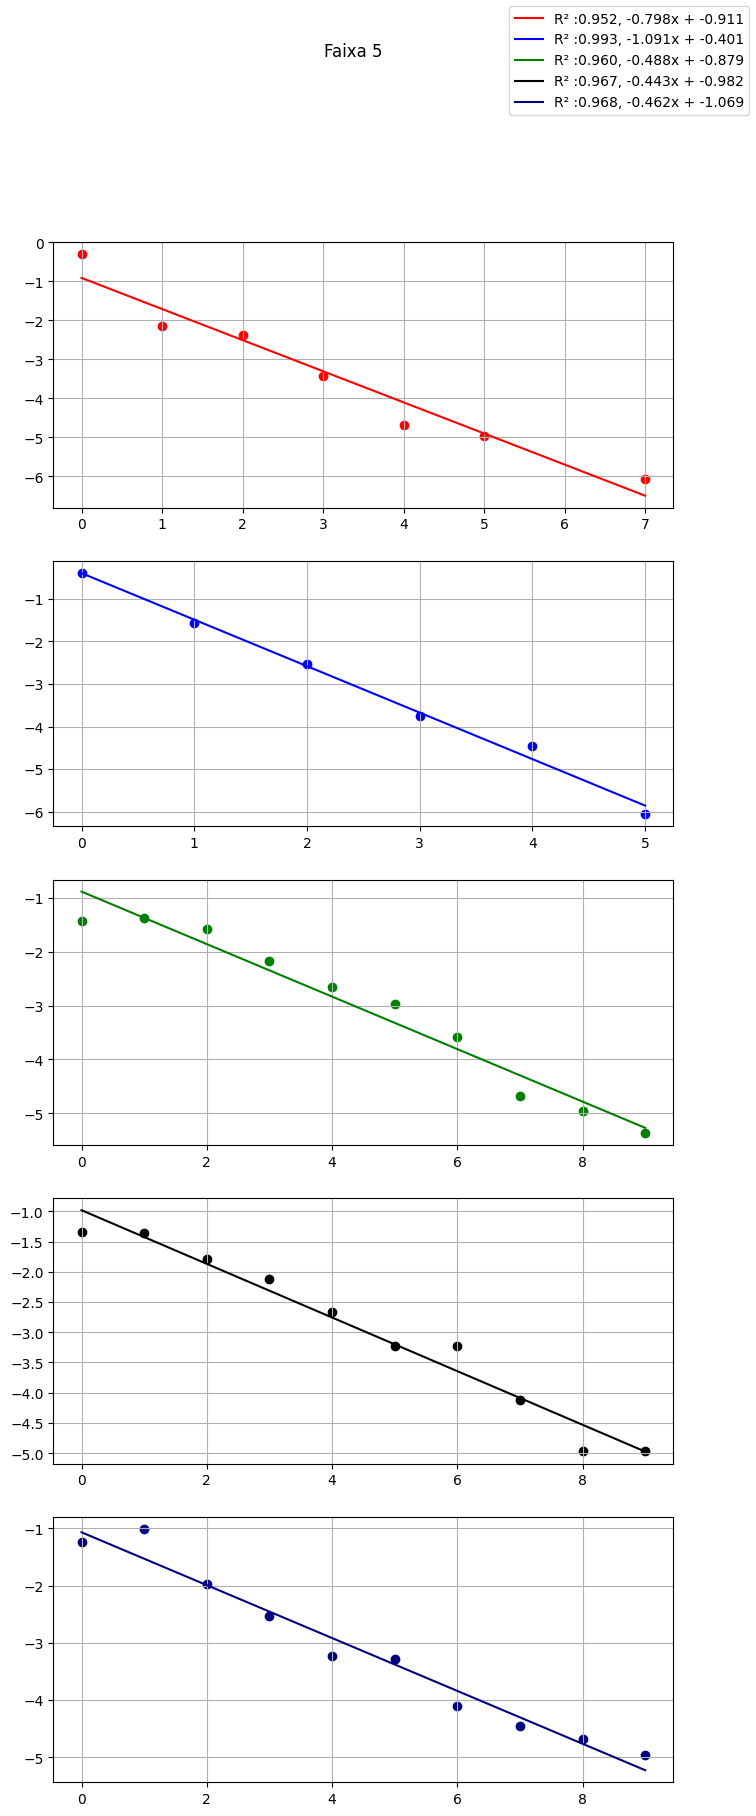

In [24]:
M,A = degree_distribution(graus,faixas,0)

In [25]:
M = - M

In [26]:
np.savetxt("./C/dados/geometry.txt",M,fmt = '%f')
np.savetxt("./C/dados/constant.txt",np.exp(A),fmt = '%f')

In [27]:
Graus = np.loadtxt("./C/dados/graus_finais.txt")
faixas_ = np.loadtxt("./C/dados/faixas_finais.txt")

0.20082449941107183 0.03867028055392728
0.13545347467608948 0.03867028055392728
0.5836277974087161 0.03867028055392728
0.2667844522968198 0.03867028055392728
0.19670200235571267 0.03867028055392728


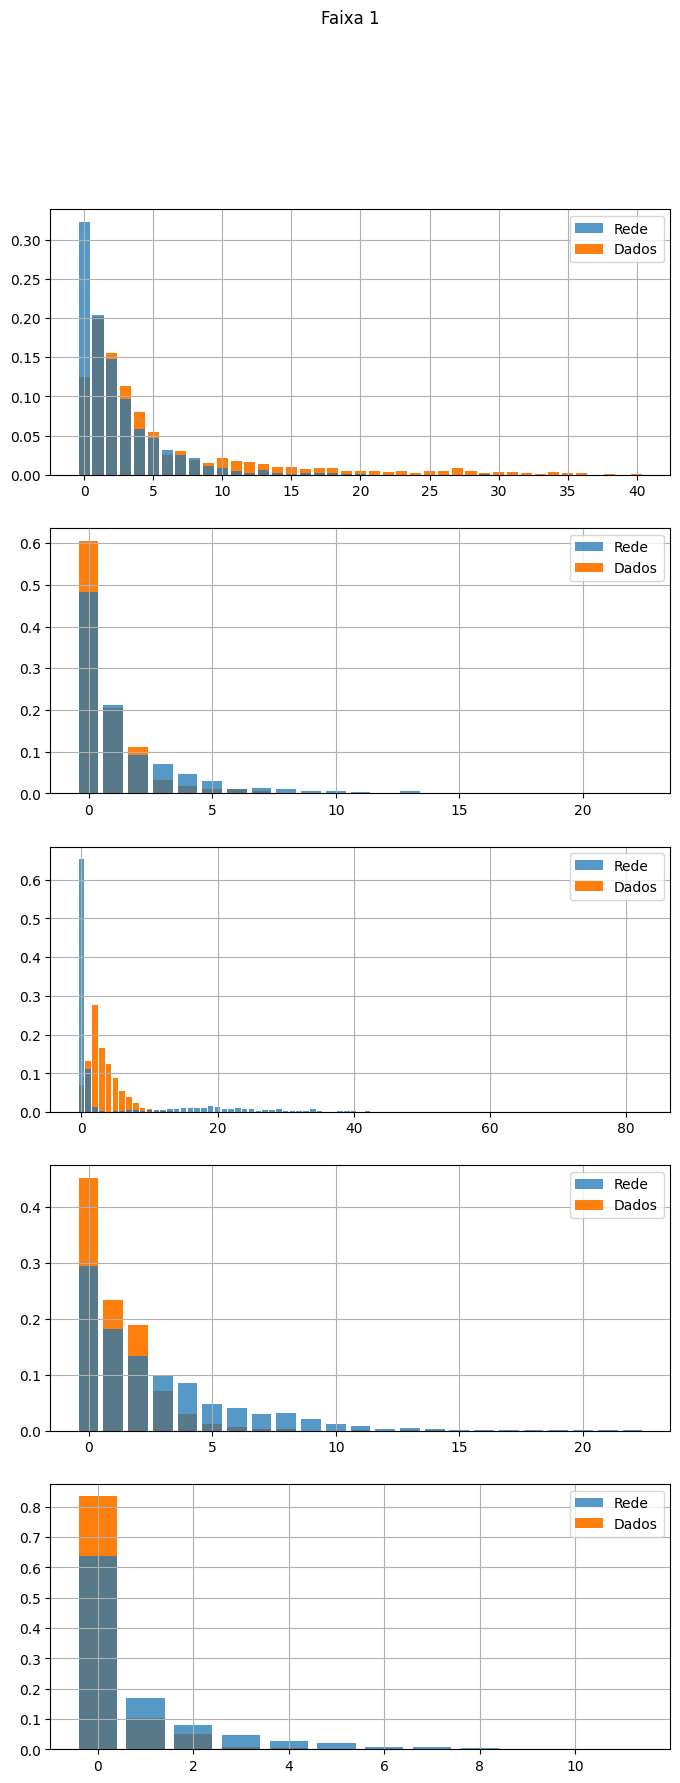

0.21385542168674698 0.08094108428817569
0.20481927710843373 0.08094108428817569
0.6475903614457832 0.08094108428817569
0.17469879518072284 0.08094108428817569
0.3493975903614458 0.08094108428817569


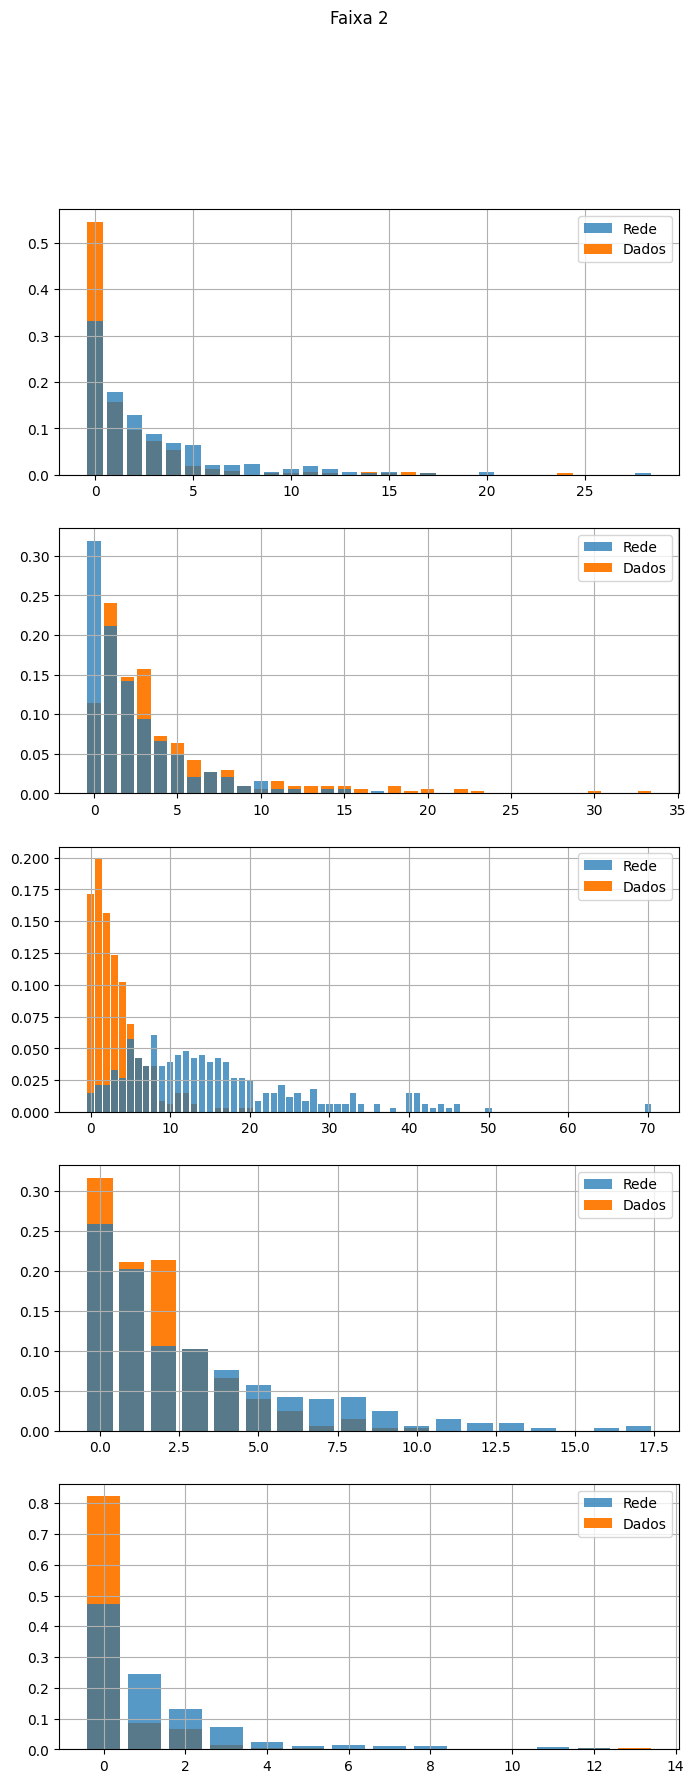

0.18888888888888888 0.06668997056719389
0.15555555555555556 0.06668997056719389
0.8066666666666666 0.06668997056719389
0.07555555555555571 0.06668997056719389
0.3511111111111111 0.06668997056719389


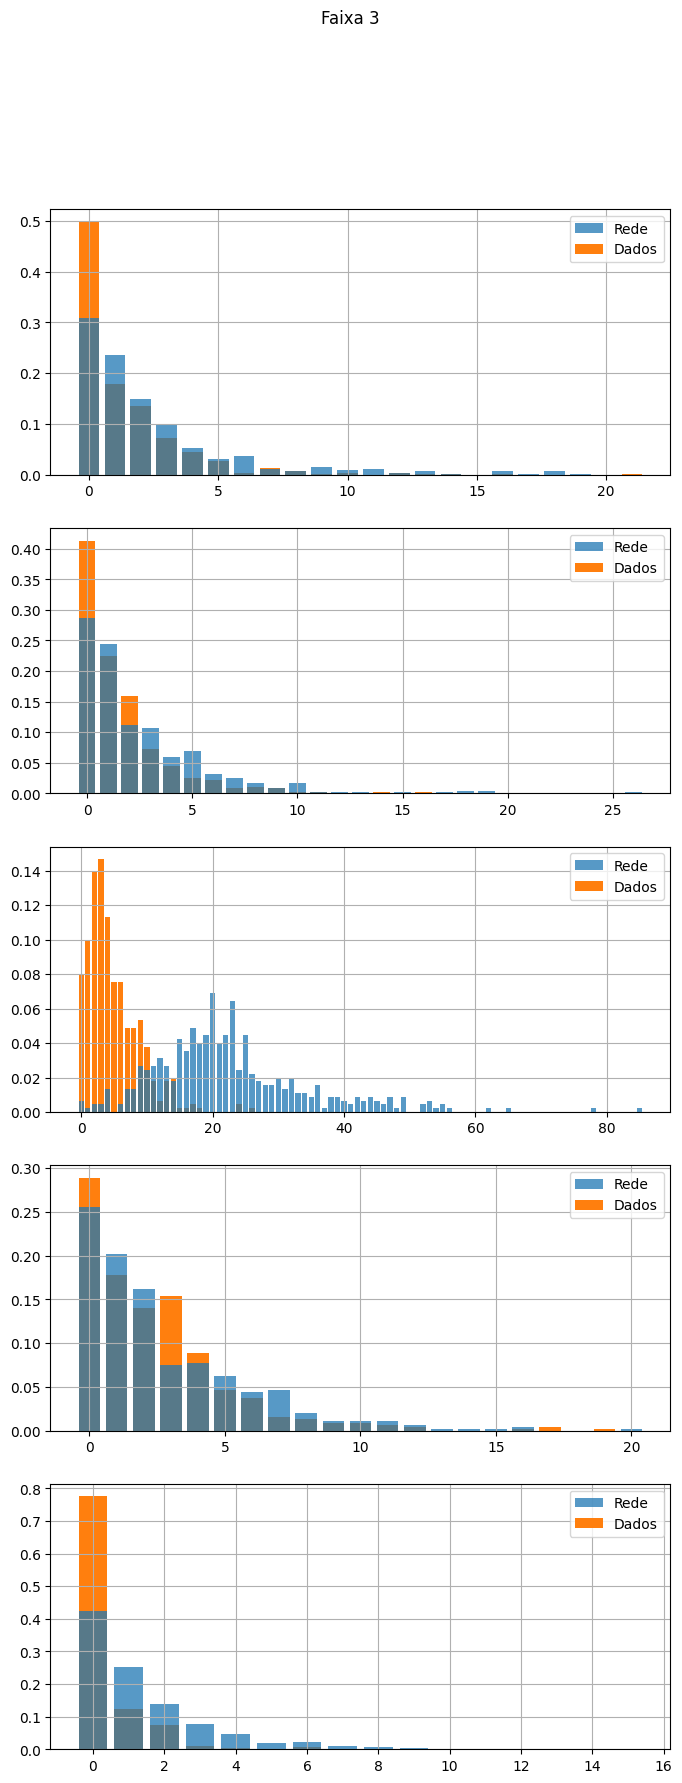

0.3283858998144713 0.047440578425633505
0.27643784786641934 0.047440578425633505
0.3126159554730984 0.047440578425633505
0.14564007421150282 0.047440578425633505
0.1493506493506494 0.047440578425633505


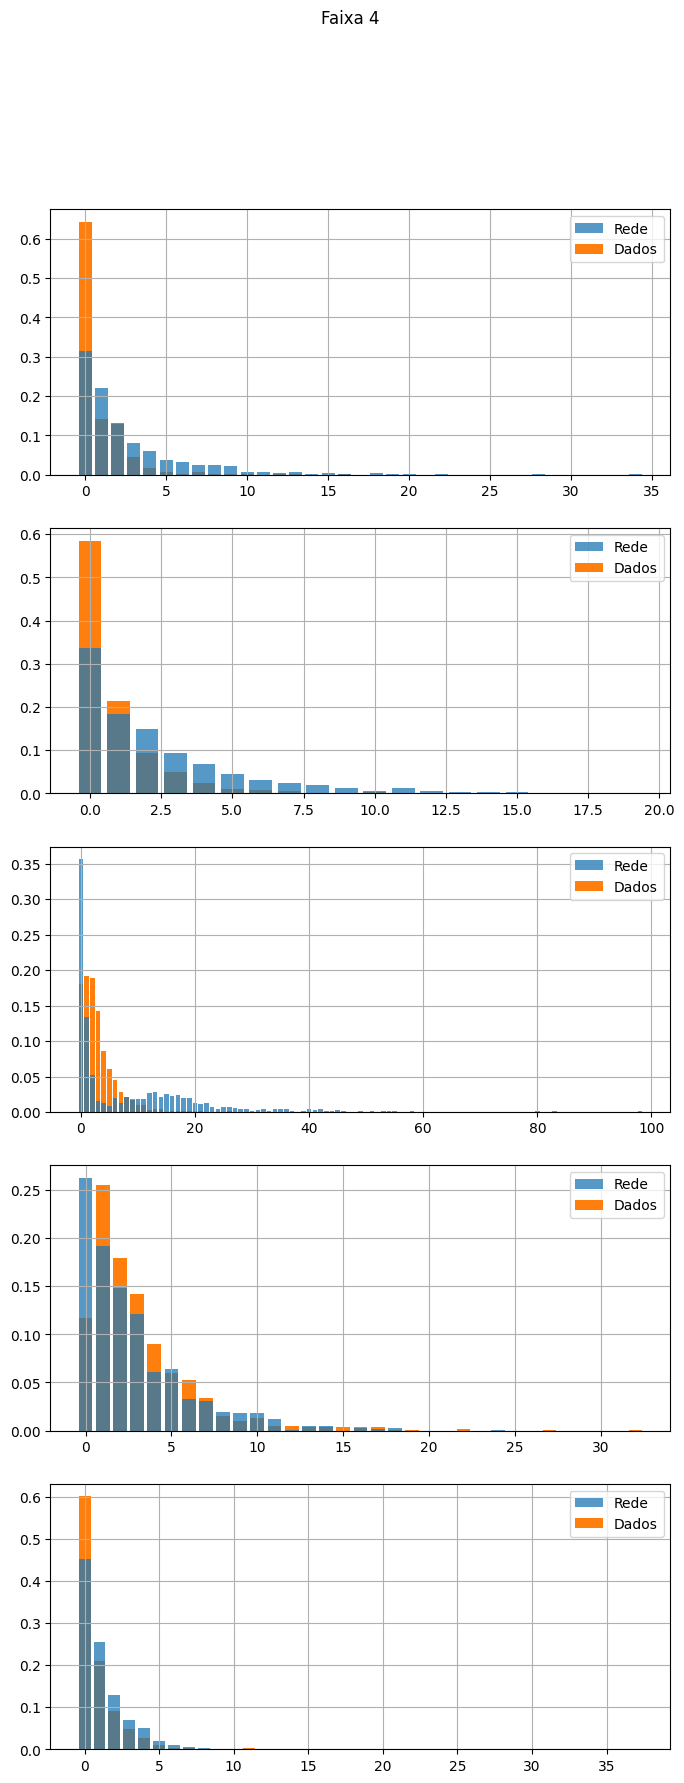

0.3668224299065421 0.07805914074062996
0.35280373831775697 0.07805914074062996
0.5794392523364487 0.07805914074062996
0.07943925233644855 0.07805914074062996
0.21028037383177572 0.07805914074062996


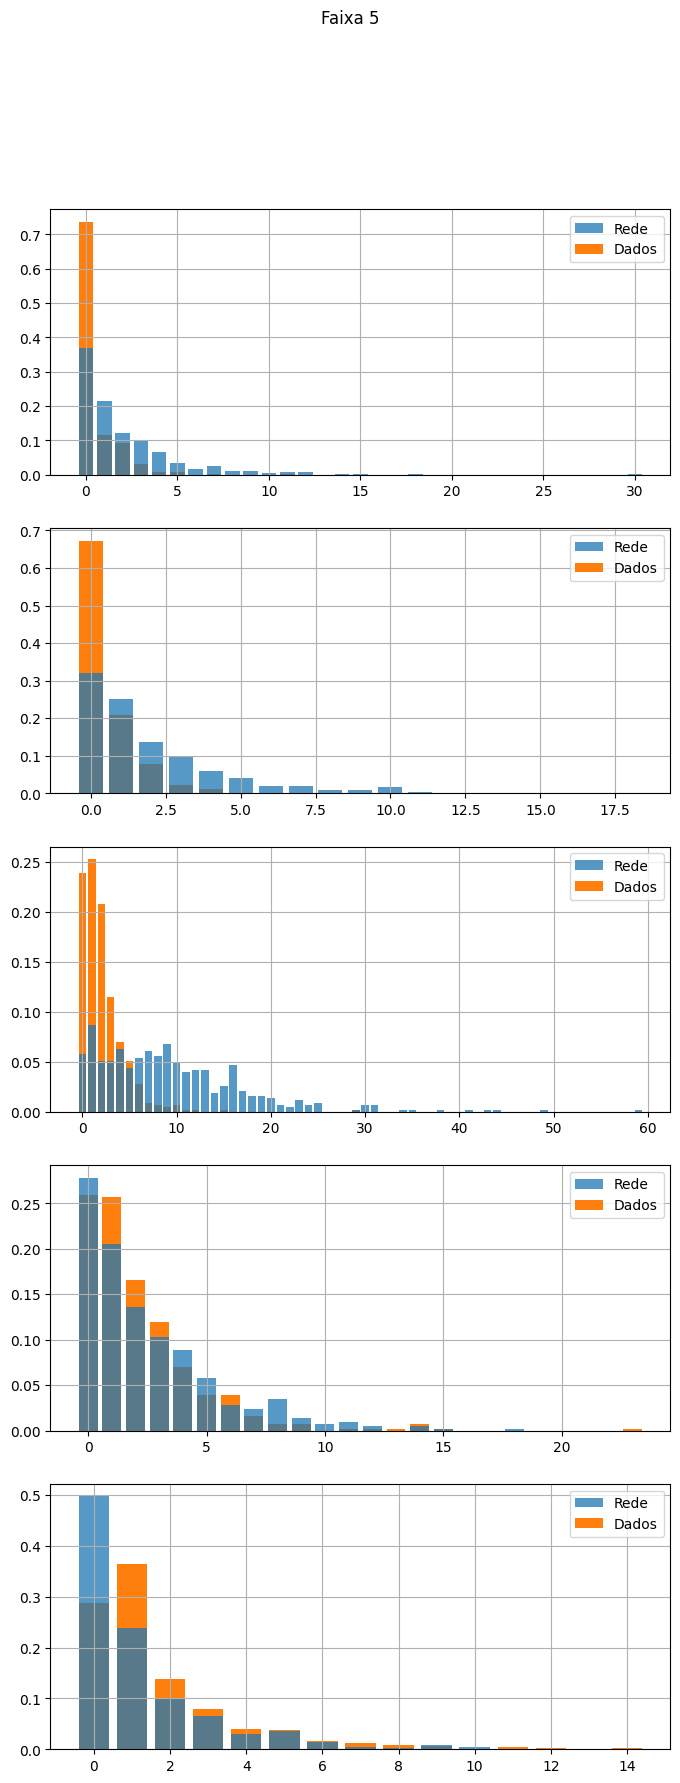

In [28]:
for faixa in range(5):
    fig, axs = plt.subplots(5,figsize=(8, 20))
    for plotinho in range(5):

        g = Graus.T[plotinho][faixas_ == faixa]
        c = graus.T[plotinho][faixas == faixa]
        C = np.sqrt(-0.5*np.log(0.05/2))*np.sqrt((len(g)+len(c))/(len(g)*len(c)))

        x = np.arange(np.max(g)+1 if(np.max(g) > np.max(c)) else np.max(c)+1)
        hist = np.zeros(len(x))
        hist2 = np.zeros(len(x))
        for i,j in zip(g,c):
            hist[int(i)] += 1
            hist2[int(j)] += 1
        
        hist = hist/np.sum(hist)
        hist2 = hist2/np.sum(hist2)

        axs[plotinho].bar(x,hist, label = 'Rede',zorder = 1,alpha = 0.75)
        axs[plotinho].bar(x,hist2, label = 'Dados',zorder = 0)
        axs[plotinho].grid()
        axs[plotinho].legend()

        for i in range(1,len(hist)):
            hist[i] += hist[i-1]
            hist2[i] += hist2[i-1]
        D = np.max(np.abs(hist - hist2))
        print(D,C)
    fig.suptitle(f"Faixa {faixa+1}")
    plt.show()

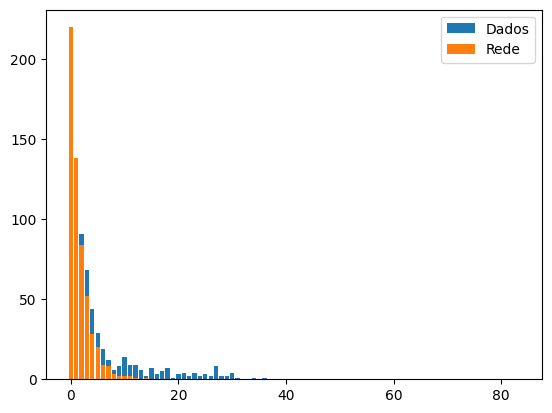

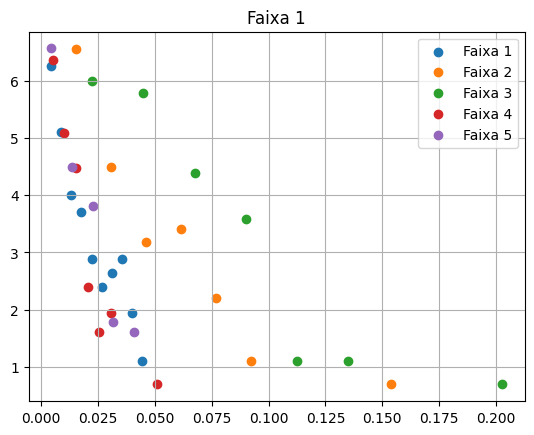

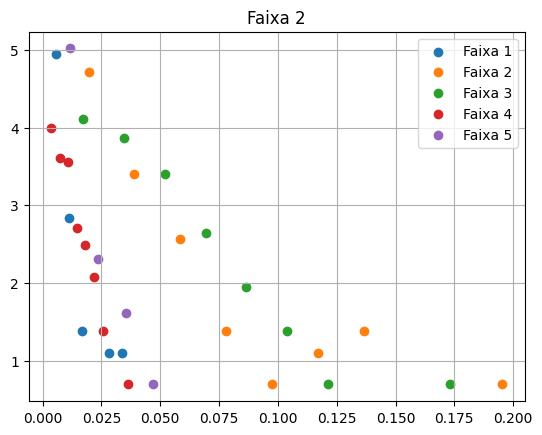

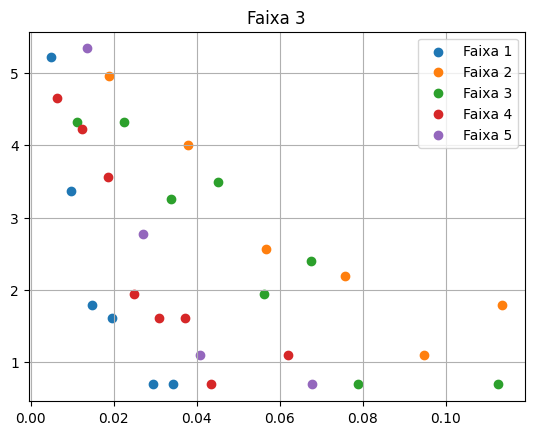

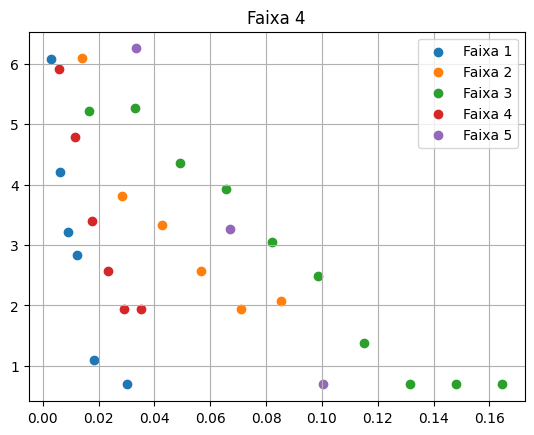

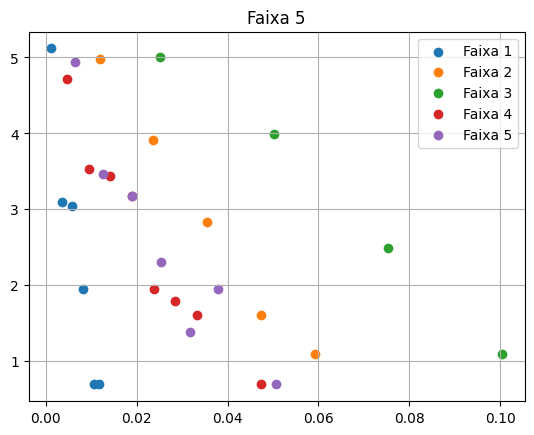

In [29]:
probability_distribution(graus,faixas)

In [201]:
lambd = 0.118

In [215]:
np.random.rand(10000)

array([0.12581794, 0.01155301, 0.72371588, ..., 0.30679002, 0.64832368,
       0.15408506])

In [218]:
k = -1*(1/lambd)*np.log(np.random.rand(10000)/(np.exp(lambd) - 1))

In [220]:
k = k.astype(int)

(array([624., 227., 143.,  66.,  22.,  12.,  12.,   3.,   2.,   2.]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <BarContainer object of 10 artists>)

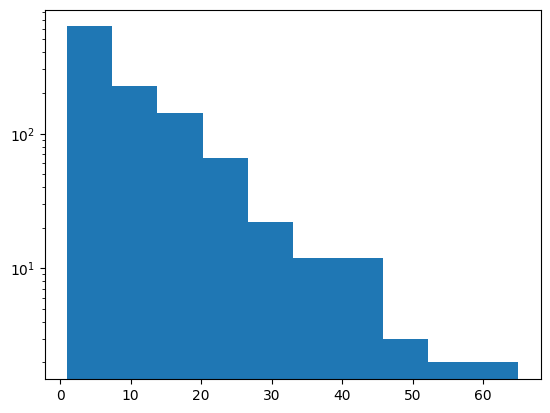

In [223]:
plt.hist(k[k> 0 ],log=True)

In [214]:
np.exp(0.118) - 1

0.12524411136734237

In [179]:
np.savetxt("teste.txt",graus[:-8],fmt = "%d")

In [178]:
np.savetxt("teste0.txt",faixas[:-8],fmt = "%d")

In [154]:
np.argsort(soma)[::-1][-10:]

array([1256,  468,  942,  648, 1043,  230, 1448, 1323, 1191, 1193])

In [31]:
M = np.zeros((5,5))

In [36]:
for faixa,g in zip(faixas,graus):
    M[faixa] += g

In [43]:
for i in range(5):
    M[i] /= 2 

In [46]:
np.ceil(M).astype(int)

array([[2384,  398, 1465,  541,  135],
       [ 142,  349,  295,  164,   36],
       [ 178,  199,  584,  298,   64],
       [ 240,  280,  860,  911,  268],
       [  68,   76,  263,  263,  199]])

A distribuição não é compatível com uma distribuição de Poisson
A distribuição não é compatível com uma distribuição de Poisson
A distribuição não é compatível com uma distribuição de Poisson
A distribuição não é compatível com uma distribuição de Poisson
A distribuição não é compatível com uma distribuição de Poisson


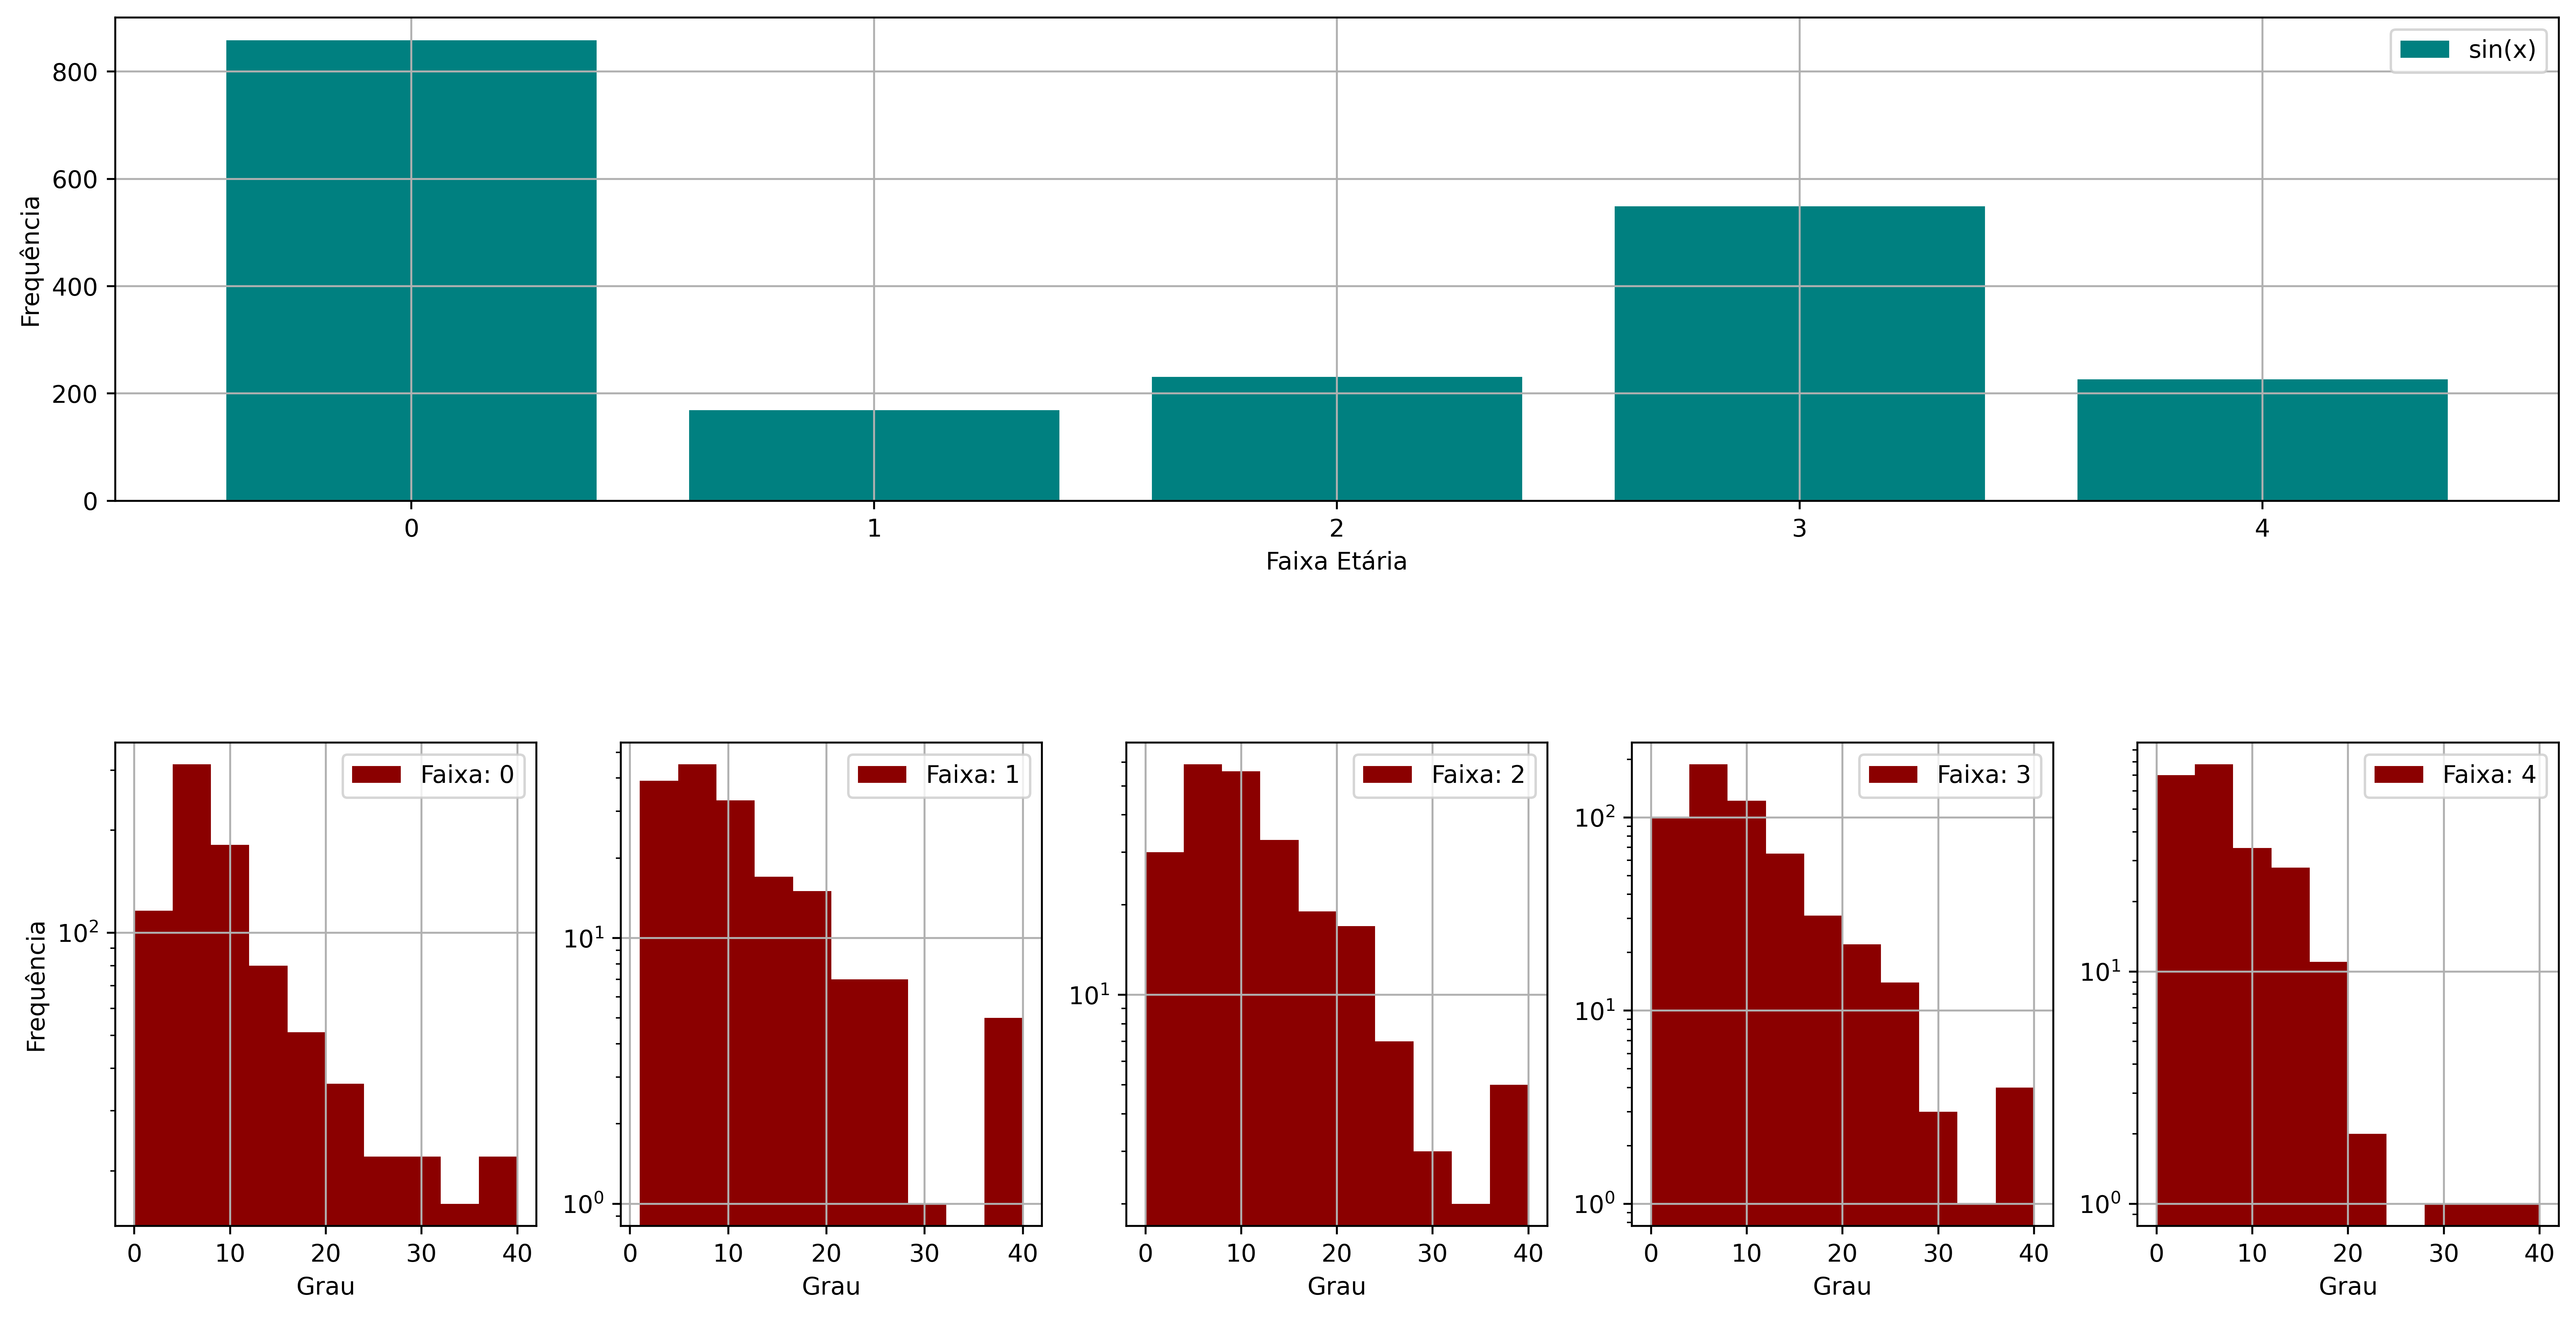

In [8]:
from scipy.stats import poisson, kstest
# Gerando dados para os gráficos

# Criando a figura e os eixos
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 10),dpi = 500)

# Removendo o primeiro eixo (axs[0,0]) para o gráfico superior
axs[0, 0].remove()
axs[0, 1].remove()
axs[0, 2].remove()
axs[0, 3].remove()
axs[0, 4].remove()

x_,y_ = np.unique(data['Faixas'],return_counts=True)
# Gráfico 1 na parte superior
axs_upper = fig.add_subplot(211)
axs_upper.bar(x_,y_, label='sin(x)',color = 'teal')
axs_upper.grid()
axs_upper.set_ylabel("Frequência")
axs_upper.set_xlabel("Faixa Etária")
#axs_upper.set_title('Gráfico 1')
axs_upper.legend()
pos = axs_upper.get_position() # obtém a posição original do subplot
pos.y0 = 0.65 # desloca para baixo o retângulo que contém o subplot
pos.y1 = 10.95 # aumenta a altura do retângulo
axs_upper.set_position(pos) # define a nova posição do subplot
# Gráfico 2
for i in range(5):
    y = list(data[data['Faixas'] == i]["#Contatos01"].values)
    ks_statistic, p_value = kstest(y, poisson(mu=sum(y)/len(y)).cdf)

    if p_value > 0.05:
        print("A distribuição é compatível com uma distribuição de Poisson")
    else:
        print("A distribuição não é compatível com uma distribuição de Poisson")
    axs[1, i].hist(y,log=True, label=f'Faixa: {i}',color = 'darkred')
    #axs[1, i].plot(x, y3, 'g-', label='tan(x)')
    #axs[1, i].set_title('Gráfico 2')
    axs[1, i].legend()
    axs[1, i].grid()
    if(i == 0):
        axs[1, i].set_ylabel("Frequência")
    axs[1, i].set_xlabel("Grau")

# Configurando o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.5,top = 0.8)
plt.savefig("./img/idade_contatos.jpg")
# Mostrando o gráfico
plt.show()


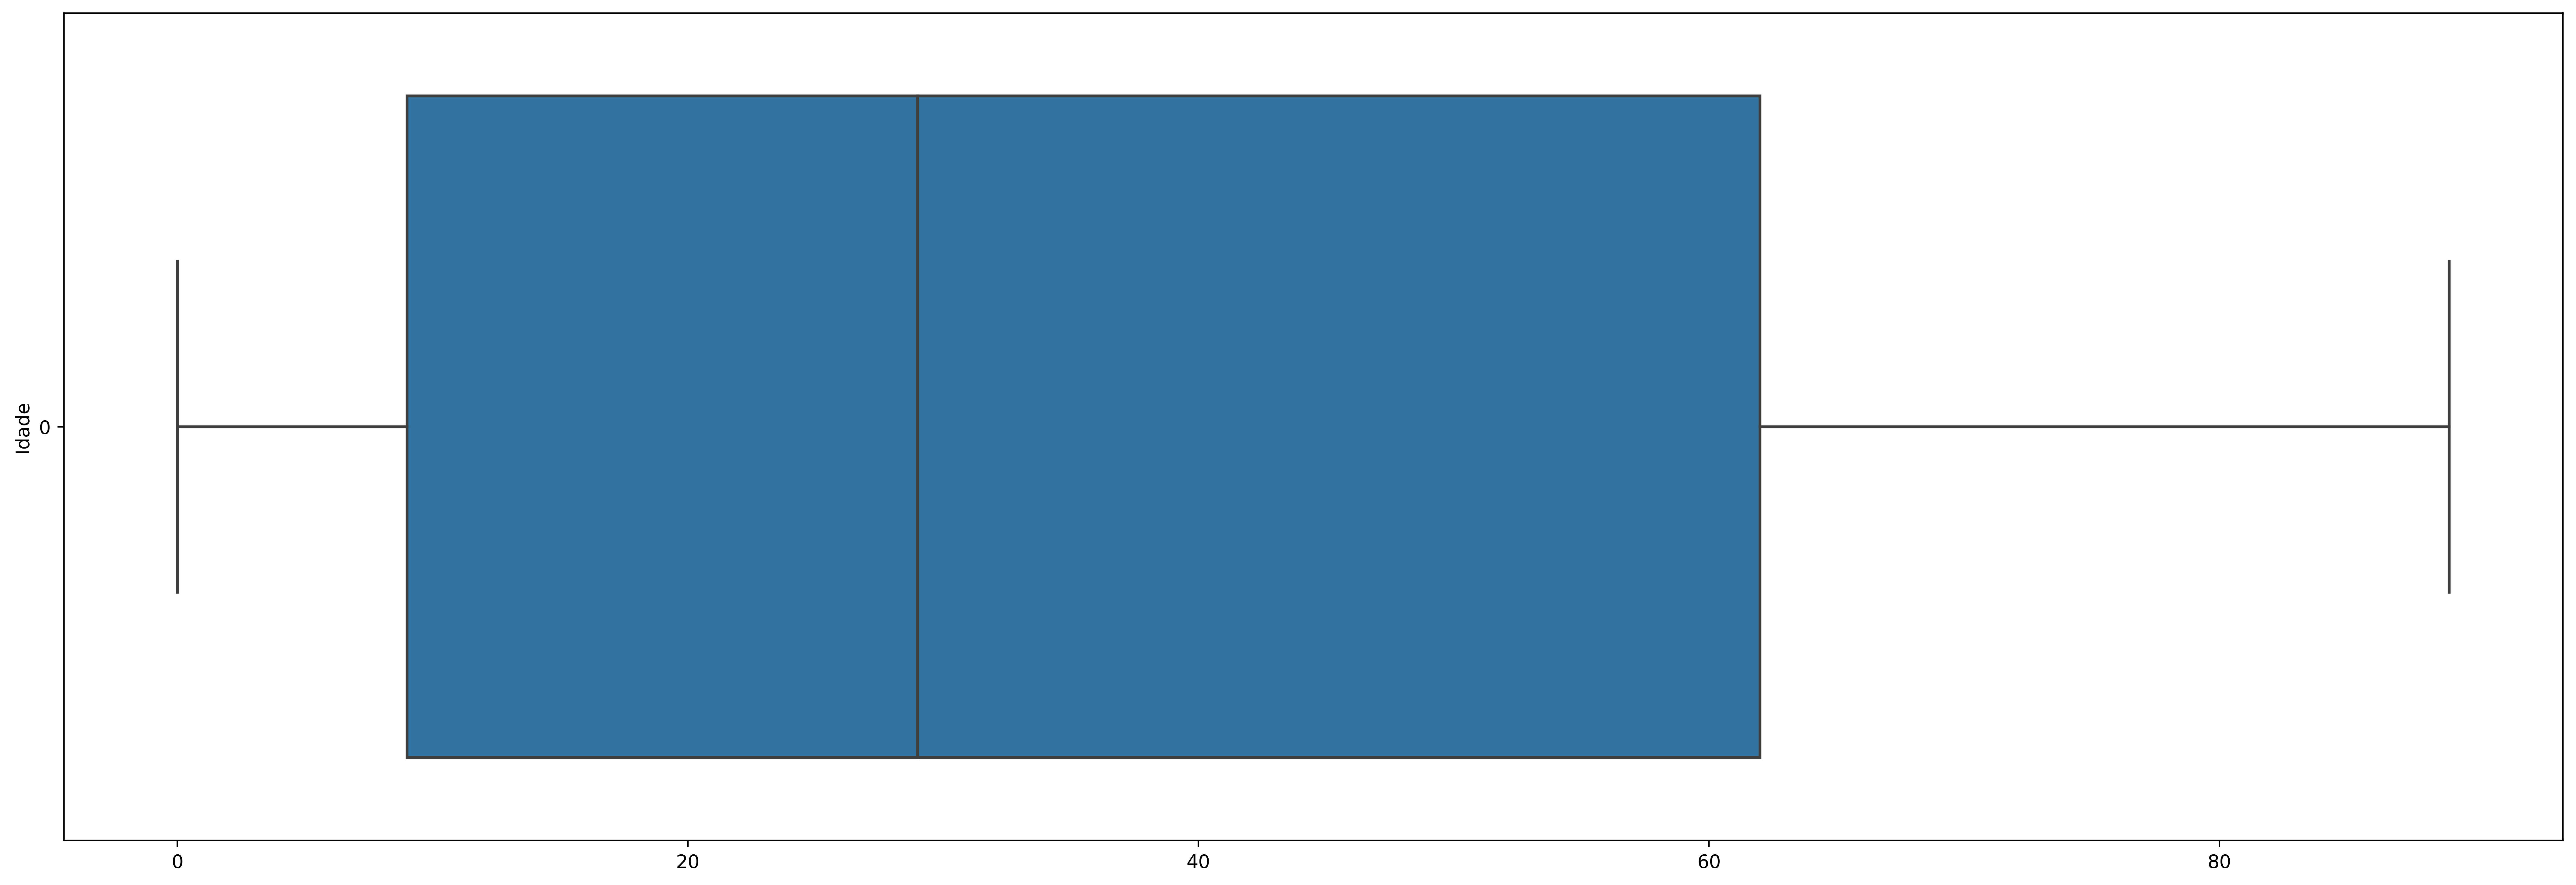

In [5]:
plt.figure(figsize=(24,8),dpi = 500)
sns.boxplot(data['Idade'].values, orient="h")
plt.ylabel('Idade')
sns.set(font_scale=1.5)
plt.show()

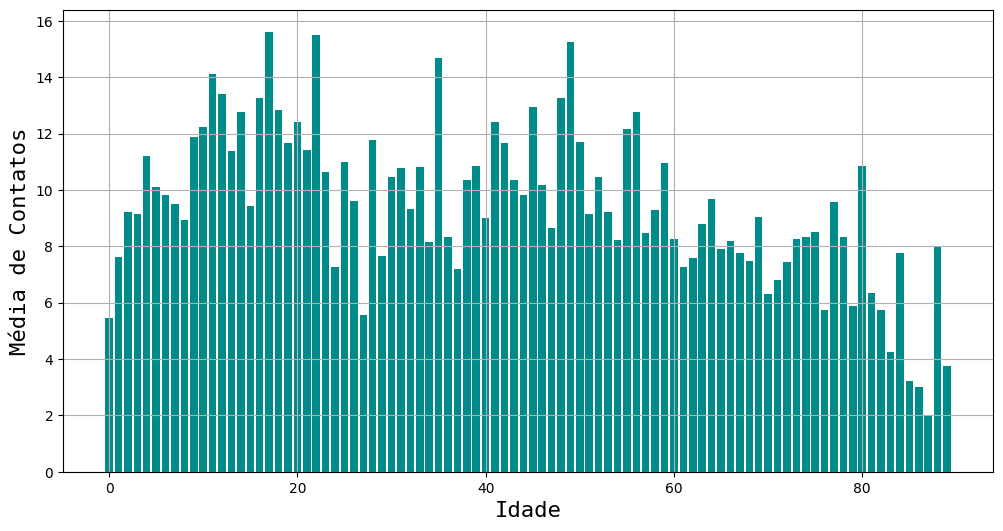

In [76]:
plot_contatos_idade(
    contatos,
    data,
    'idade_contatos'
    ,''
)

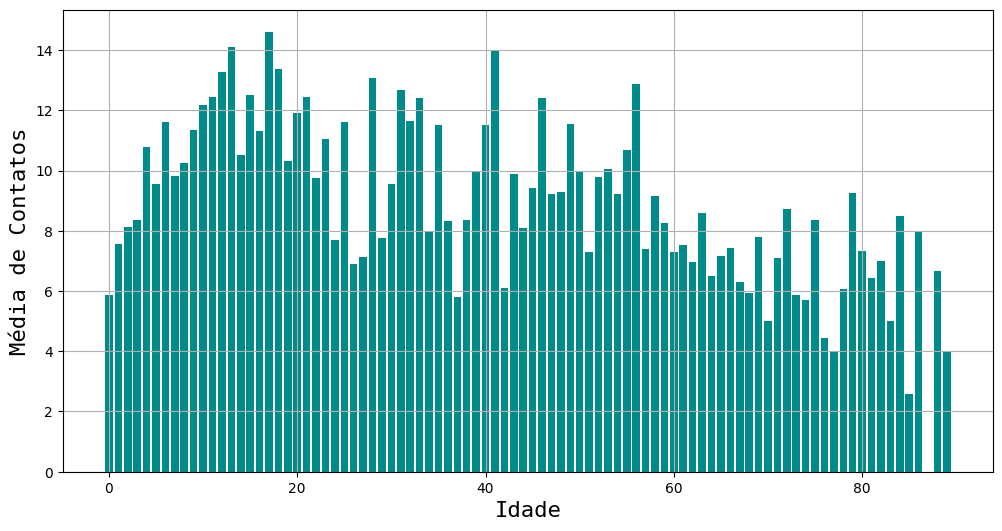

In [78]:
plot_contatos_idade(
    contatos02,
    data,
    'idade_contatos_02',
    ''
)

In [72]:
plot_mes(contatos,'contatos_mes')

KeyError: 'dia/mês'

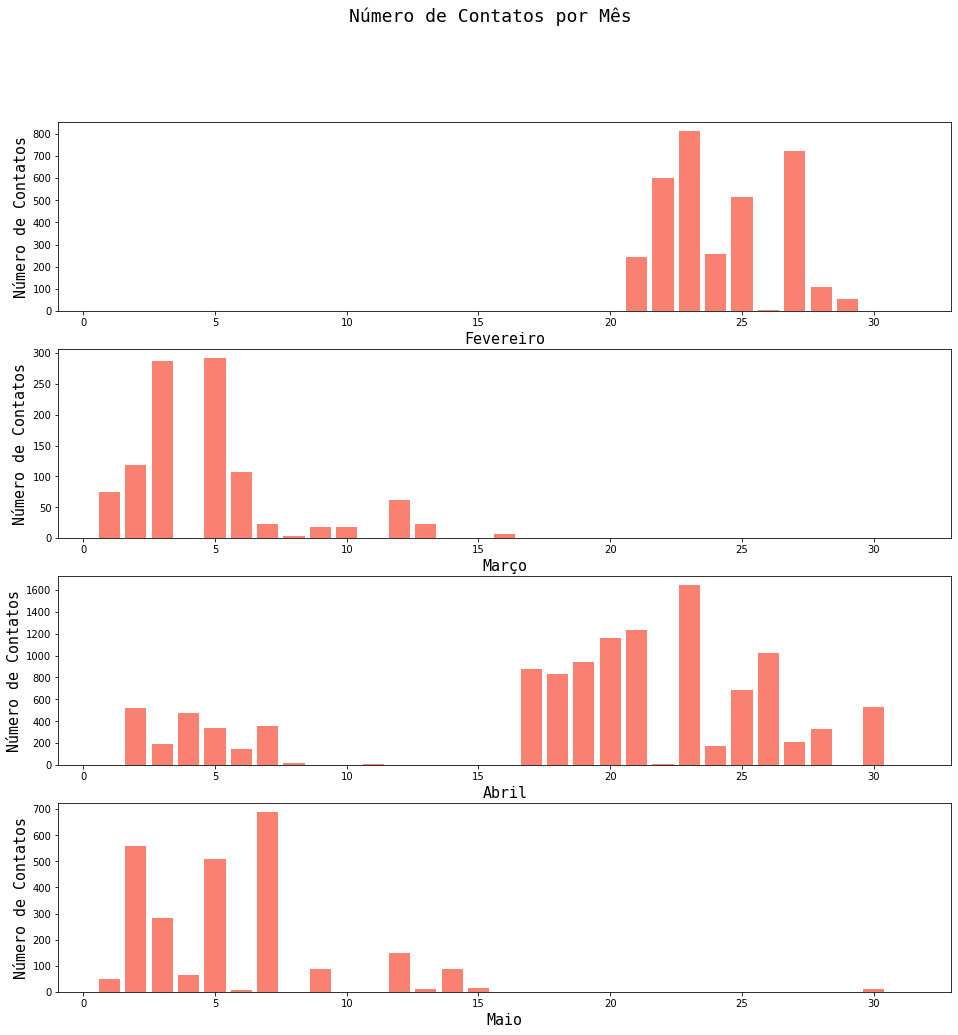

In [14]:
plot_mes(contatos02,'contatos_mes02')

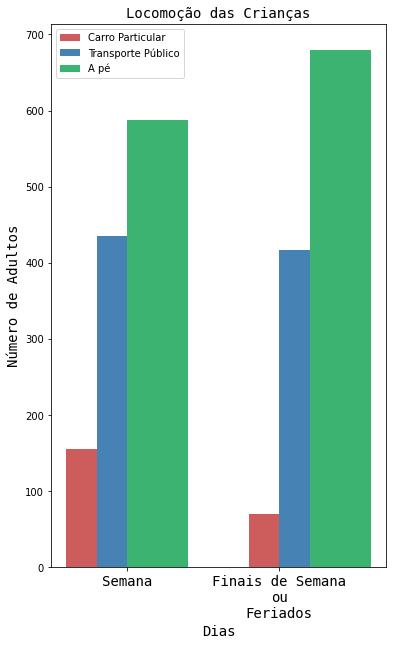

In [15]:
locomotion_hist(
    df[df["Tipo de questionário"] == 0],
    'Locomoção das Crianças',
    'locomotion_criancas'
)

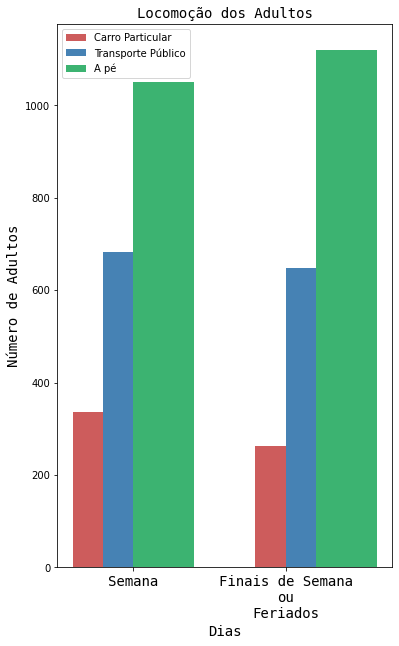

In [16]:
locomotion_hist(
    df[df["Tipo de questionário"] == 1],
    'Locomoção dos Adultos',
    'locomotion_adultos'
)

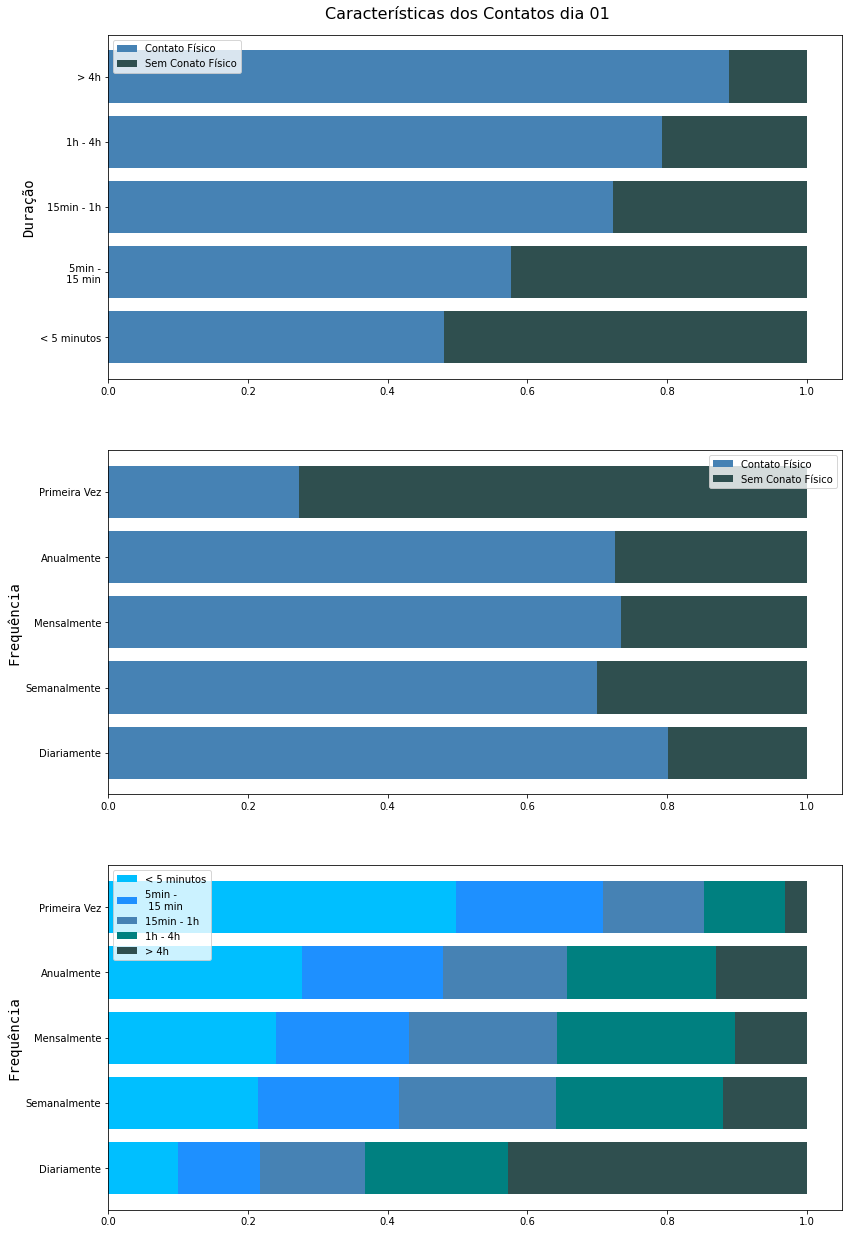

In [17]:
multiple_stacked_bar(
    contacts,
    'Características dos Contatos dia 01',
    'contatos01'
)

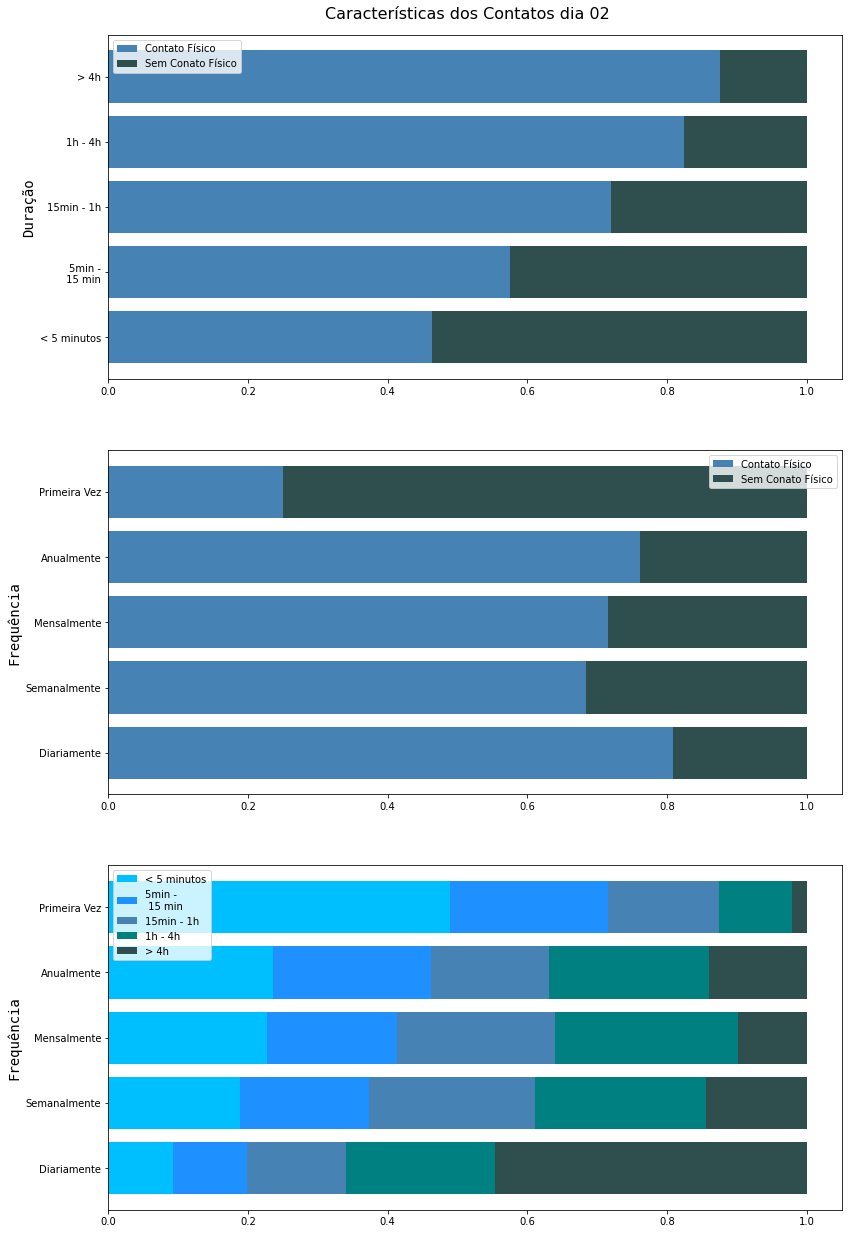

In [20]:
multiple_stacked_bar(
    contacts02,
    'Características dos Contatos dia 02',
    'contatos02'
)

In [113]:
contatos

,id,idade,Frequência,Pele,Duração
0,0,68.0,1.0,2.0,5.0
1,0,55.0,2.0,1.0,3.0
2,1,29.0,1.0,1.0,5.0
3,1,33.0,1.0,1.0,4.0
4,1,3.0,1.0,1.0,5.0
...,...,...,...,...,...
19839,2032,47.0,5.0,2.0,2.0
19840,2032,47.0,5.0,2.0,2.0
19841,2032,52.0,5.0,2.0,2.0
19842,2032,62.0,5.0,2.0,2.0


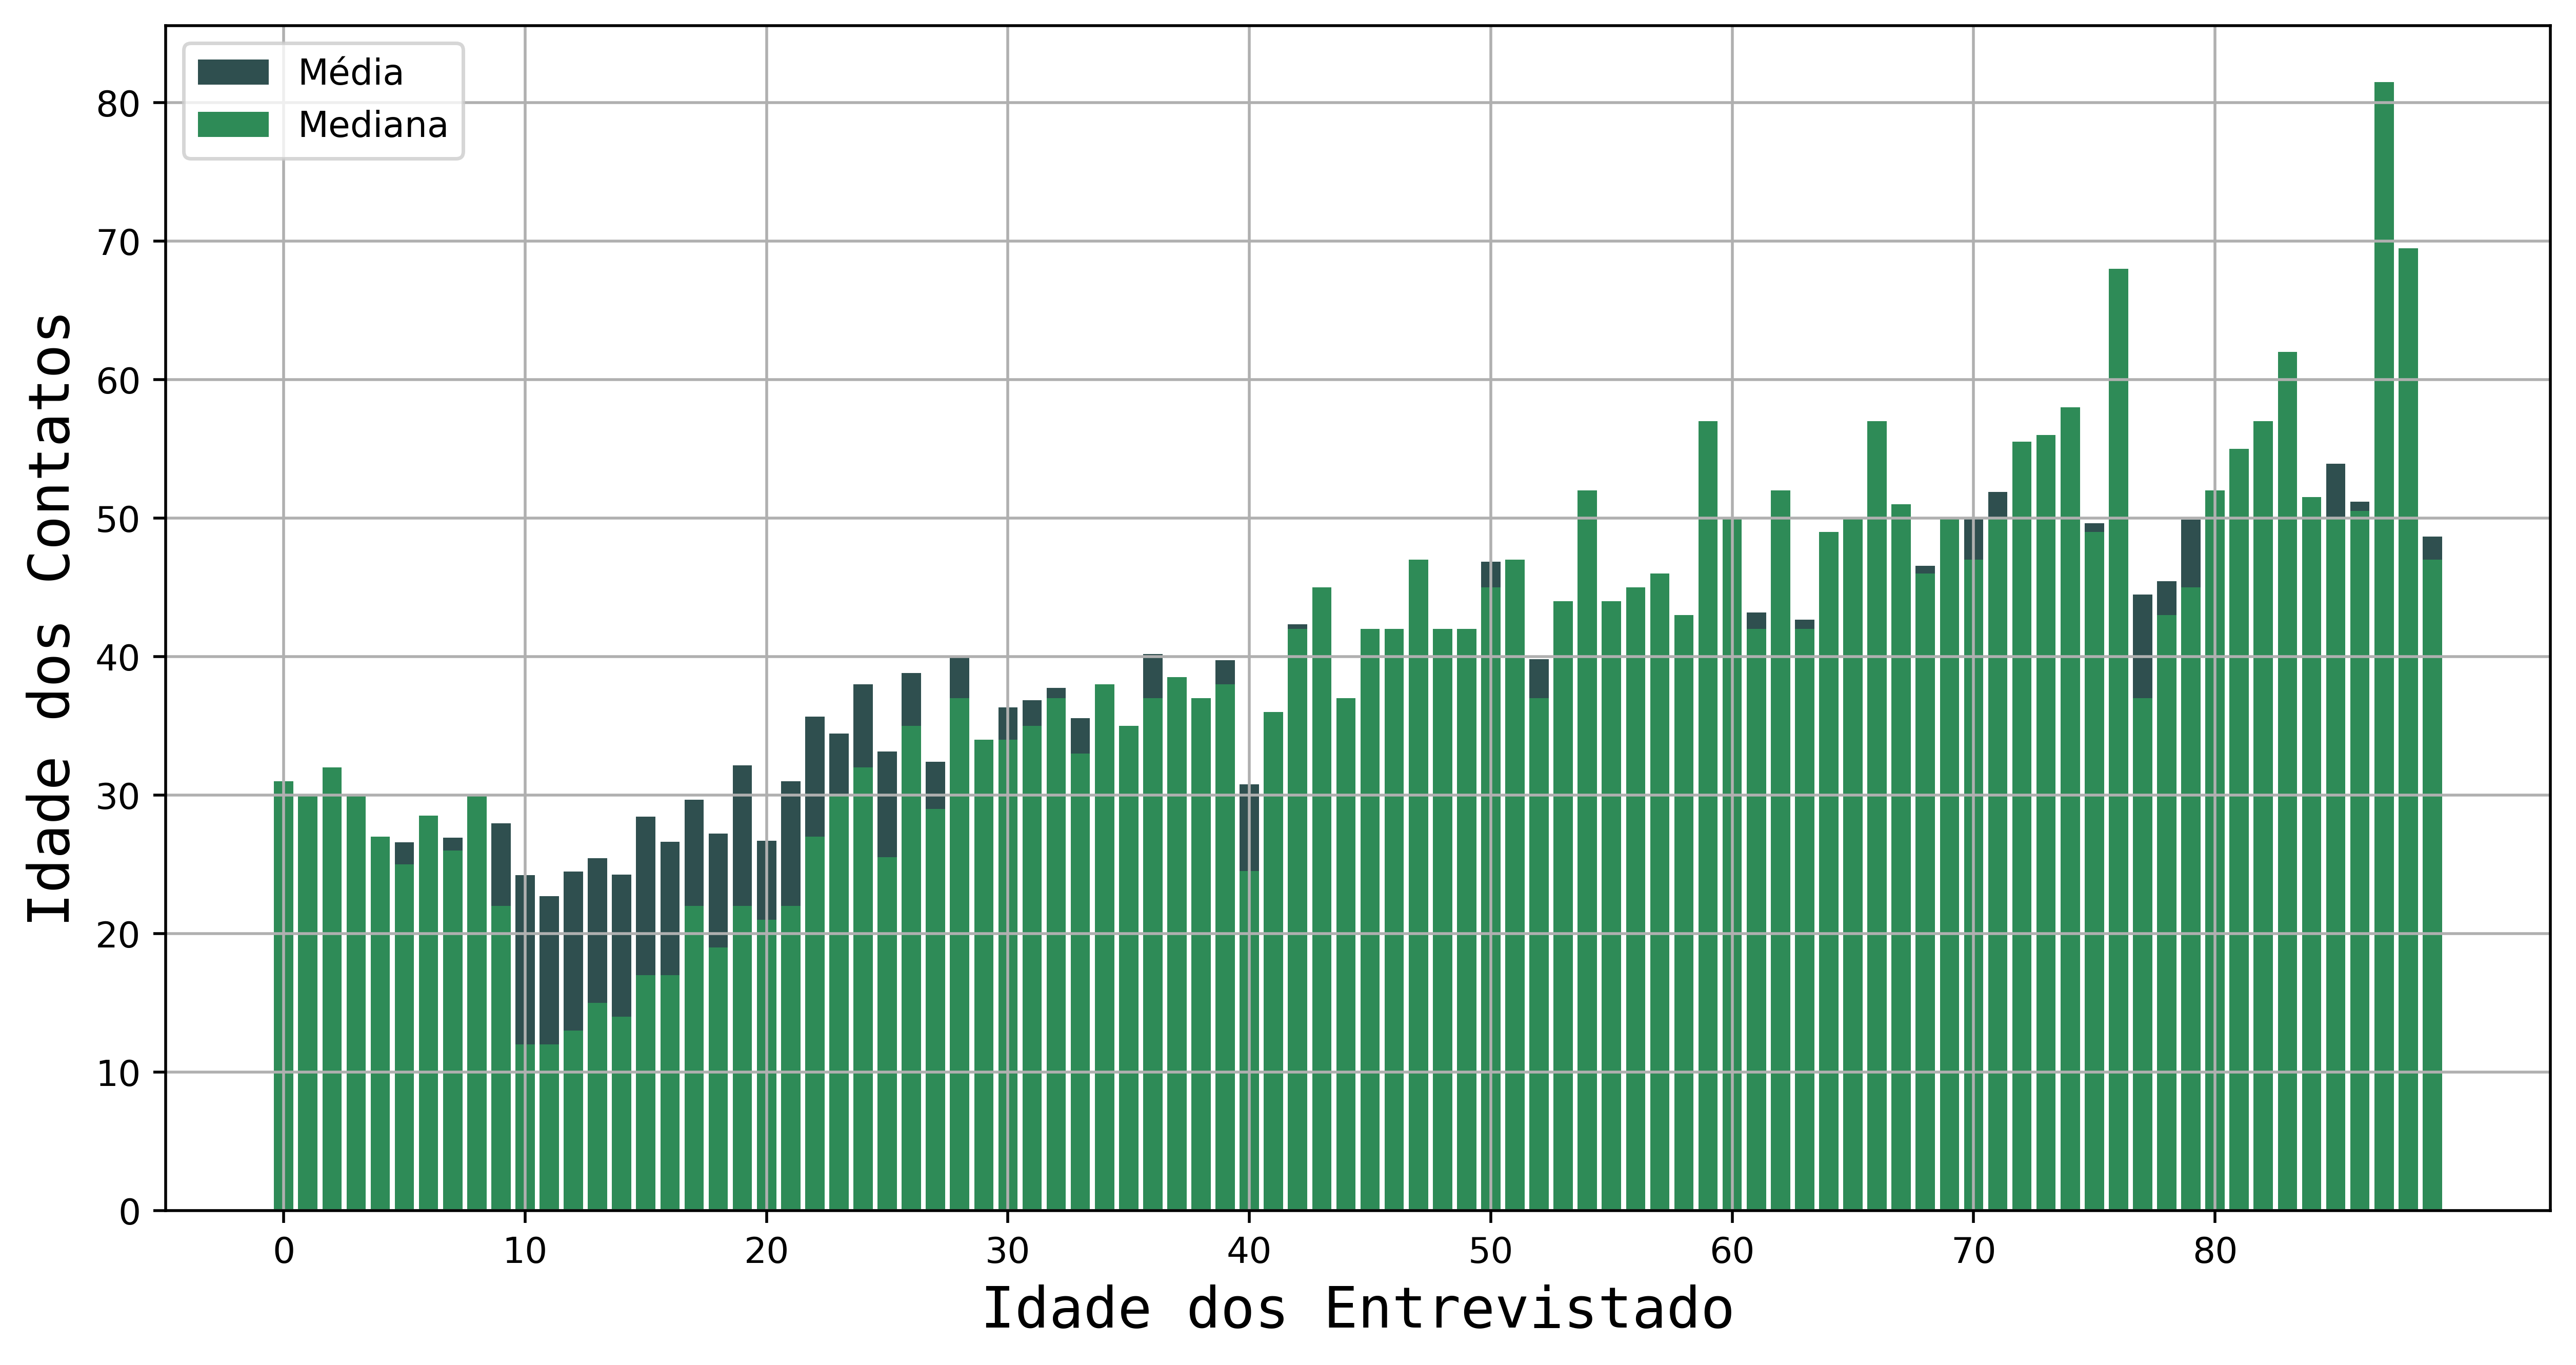

In [112]:
conncection_idade(contatos,data)

/home/miguel/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/miguel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


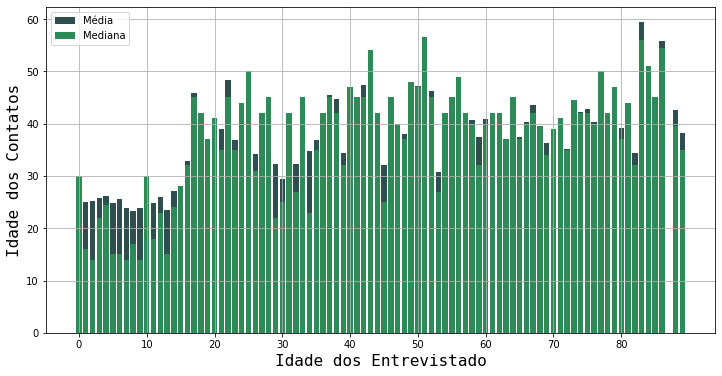

In [61]:
conncection_idade(contacts02,df)

In [15]:
C = heat_conncetion(data,contatos,contatos02)

In [16]:
C

array([[2285.,  460., 1517.,  678.,  163.],
       [ 460.,  326.,  441.,  383.,   86.],
       [1517.,  441.,  544., 1062.,  277.],
       [ 678.,  383., 1062.,  836.,  460.],
       [ 163.,   86.,  277.,  460.,  177.]])

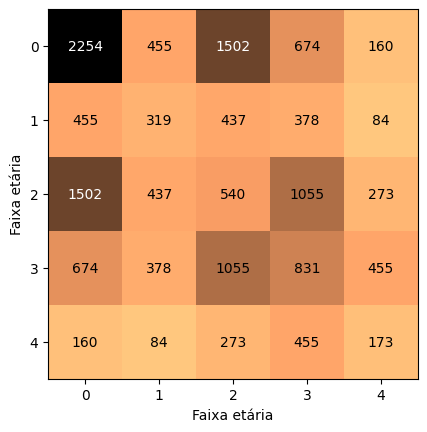

In [7]:
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        text = plt.text(j, i, round(C[i, j], 2),ha='center', va='center', color='w' if(C[i,j] > 1500) else 'k')
plt.imshow(C, cmap='copper_r')
plt.xlabel("Faixa etária")
plt.ylabel("Faixa etária")
#plt.colorbar()
plt.show()

In [6]:
faixas, total = np.unique(data['Faixas'],return_counts=True)
M = np.zeros((len(total),len(total)))
for i in range(len(total)):
    for j in range(len(total)):
        M[i][j] = total[i]*total[j] if(i!=j) else total[i]*(total[i]-1)/2
M = C/M

In [30]:
M

array([[0.00613078, 0.00313789, 0.00757828, 0.00143087, 0.00082513],
       [0.00313789, 0.02247112, 0.01119393, 0.00407411, 0.0021993 ],
       [0.00757828, 0.01119393, 0.0203275 , 0.00831894, 0.00522928],
       [0.00143087, 0.00407411, 0.00831894, 0.00552431, 0.00366717],
       [0.00082513, 0.0021993 , 0.00522928, 0.00366717, 0.00680433]])

In [17]:
total

array([858, 169, 231, 549, 226])

In [28]:
np.savetxt("./Julia/input/probability.txt",M,fmt = "%f")

In [25]:
M

array([[0.00613078, 0.00313789, 0.00757828, 0.00143087, 0.00082513],
       [0.00313789, 0.02247112, 0.01119393, 0.00407411, 0.0021993 ],
       [0.00757828, 0.01119393, 0.0203275 , 0.00831894, 0.00522928],
       [0.00143087, 0.00407411, 0.00831894, 0.00552431, 0.00366717],
       [0.00082513, 0.0021993 , 0.00522928, 0.00366717, 0.00680433]])

In [16]:
np.savetxt("./output/P.txt",total/np.sum(total),fmt = "%f")

In [19]:
faixas

[[0, 20], [20, 30], [30, 50], [50, 70], [70, 100000]]

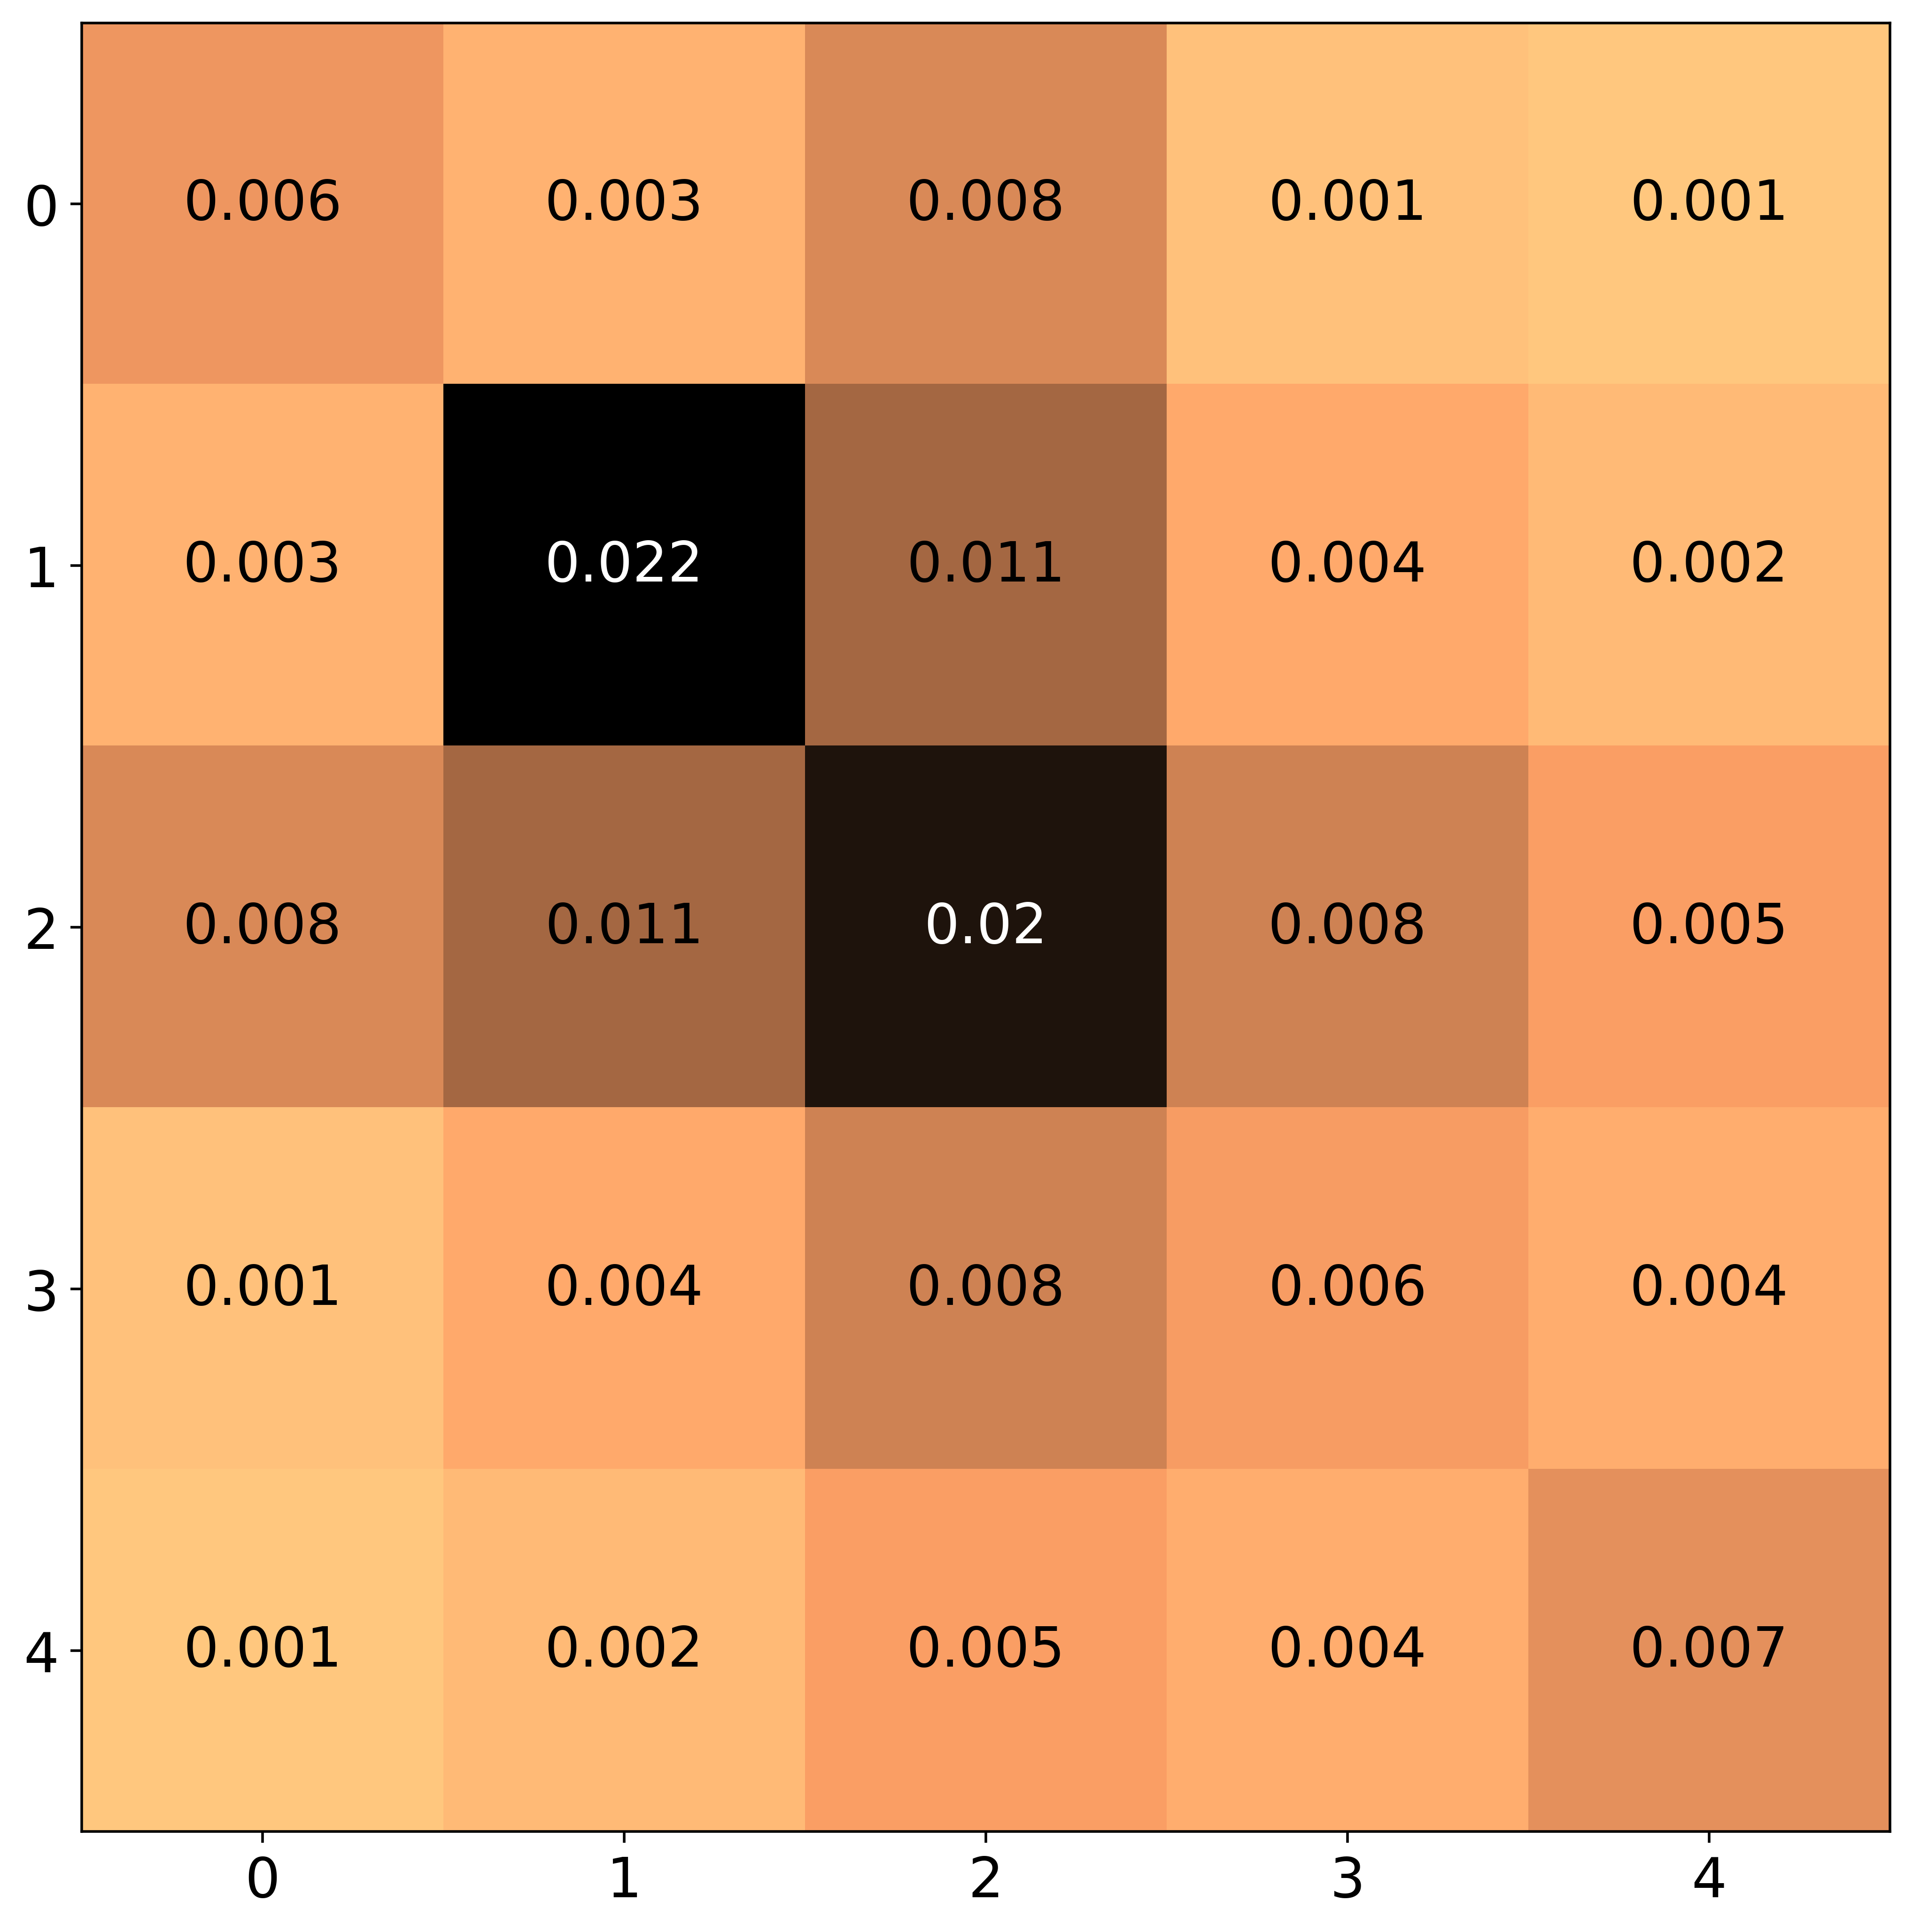

In [29]:
mpl.rcParams['font.size'] = 17
plt.figure(figsize=(10,10),dpi = 500)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        text = plt.text(j, i, round(M[i, j], 3),ha='center', va='center', color='w' if(M[i,j] > 0.02) else 'k')
plt.imshow(M, cmap='copper_r')
ax = plt.gca()
#faixa = [f"[{i[0]},{i[1]})" if(70 != i[0]) else f">= 70" for i in faixas]
#print(faixa)
# Defina os rótulos dos ticks no eixo y
#ax.set_yticklabels(faixa)
plt.savefig("./img/map.jpg")
plt.show()

array([[0.00613078, 0.00627578, 0.01515656, 0.00286174, 0.00165027],
       [0.00627578, 0.02247112, 0.02238787, 0.00814822, 0.0043986 ],
       [0.01515656, 0.02238787, 0.0203275 , 0.01663789, 0.01045857],
       [0.00286174, 0.00814822, 0.01663789, 0.00552431, 0.00733433],
       [0.00165027, 0.0043986 , 0.01045857, 0.00733433, 0.00680433]])

In [13]:
mortalidade = {}

In [4]:
df = pd.read_csv(
        './input/INFLUD20-27-03-2023.csv',
        delimiter = ';',
        usecols = ['NU_IDADE_N','EVOLUCAO','CLASSI_FIN','HOSPITAL']
    )
covid = df[df['CLASSI_FIN'] == 5]
covid.drop('CLASSI_FIN', inplace=True, axis=1)
covid = covid.dropna()

/tmp/ipykernel_500861/1168424176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.drop('CLASSI_FIN', inplace=True, axis=1)


In [5]:
covid

,NU_IDADE_N,HOSPITAL,EVOLUCAO
26,57,1.0,1.0
32,61,1.0,1.0
37,92,1.0,2.0
39,60,1.0,2.0
63,54,1.0,2.0
...,...,...,...
1200372,67,1.0,2.0
1200374,57,1.0,1.0
1200375,82,2.0,2.0
1200376,76,1.0,2.0


In [6]:
def transform_faixa(i,Faixa):
    for j in range(len(Faixa)):
        if(i < Faixa[j][0]):
            return j - 1
    return j

In [7]:
Faixa = [
    [0,20],
    [20,30],
    [30,50],
    [50,70],
    [70,10000]
]

In [8]:
Idade = covid['NU_IDADE_N'].values
Idade = np.array([transform_faixa(i,Faixa) for i in Idade])
covid['Faixa'] = Idade
hospital = covid[covid['HOSPITAL'] == 1]

In [15]:
hospital

,NU_IDADE_N,HOSPITAL,EVOLUCAO,Faixa
26,57,1.0,1.0,3
32,61,1.0,1.0,3
37,92,1.0,2.0,4
39,60,1.0,2.0,3
63,54,1.0,2.0,3
...,...,...,...,...
1200367,72,1.0,2.0,4
1200372,67,1.0,2.0,3
1200374,57,1.0,1.0,3
1200376,76,1.0,2.0,4


In [16]:

for i in range(5):
    a = hospital[hospital['Faixa'] == i]
    b = a[a['EVOLUCAO'] == 2]
    print(b.shape[0]/a.shape[0])

0.07710809281267686
0.09561476547321676
0.13779231777947765
0.30044562859568047
0.530315172817809


In [5]:
mortalidade['sem vacina'] = generate_mortalidade(df)

In [6]:
mortalidade

{'sem vacina': {'0 <= Idade < 20 ': 0.07355182926829268,
  '20 <= Idade < 30 ': 0.08337555414819506,
  '30 <= Idade < 50 ': 0.13536964163018234,
  '50 <= Idade < 70 ': 0.30269612895246734,
  '70 <= Idade < 100000 ': 0.5266224287233722}}